# Kalp Hastalığı Analizi

https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset/data
https://www.kaggle.com/code/alexteboul/heart-disease-health-indicators-dataset-notebook
https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf


## 1. Giriş - Kütüphaneleri Oluşturmak ve DataFrame'i yüklemek

Öncelikle, veri işleme için gerekli olan kütüphaneleri çağırıyoruz. Makine öğrenmesi kısmını ise en son gerçekleştireceğim.

Veri kaynağı, halihazırda temizlenip düzenlenmiş bir veri setidir. Veri setinin orijinalinde ise BRFSS kurumunun telefonla 2015 gerçekleştirdiği gerçek bir çalışmadır. 

Veri temizliği yapılış tarzı, veri kaynağından ulaşılabilir. Kısaca, sütun isimleri okunacak bir hale getirilmiş, cevaplardaki değişik kodlamalar daha sadeleştirilmiş ve boş değerler düşürülmüştür.

In [4]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency


heart_data = pd.read_csv("/kaggle/input/heart-disease-health-indicators-dataset/heart_disease_health_indicators_BRFSS2015.csv")

## 2. DataFrame'i Kontrol Etmek ve Verileri Tanımlamak


Sonra veri setimizi dataframe haline dönüştürüp, verilerin type larını kontrol ediyorum.

In [2]:
print(heart_data.isnull().sum())
heart_data.dtypes

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


HeartDiseaseorAttack    float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
Diabetes                float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

Tüm değişkenlerimizin float64 biçiminde olduğunu gördük. Dolayısıyla veriler kullanmak için hazır gözüküyor. 

Ancak verilerimin bir kısmı aslında kategorik veriler, örneğin cinsiyet ve eğitim durumu. Bunların nasıl kodlandığını ise henüz bilmiyorum. Bunu kontrol etmek için bir for loop'u ile sütun isimleri ve içerdiği veri değerlerini kontrol edeceğim.

In [3]:
c = 0
for i in heart_data:
    print(heart_data.columns[c], heart_data[i].unique())
    c = c + 1

HeartDiseaseorAttack [0. 1.]
HighBP [1. 0.]
HighChol [1. 0.]
CholCheck [1. 0.]
BMI [40. 25. 28. 27. 24. 30. 34. 26. 33. 21. 23. 22. 38. 32. 37. 31. 29. 20.
 35. 45. 39. 19. 47. 18. 36. 43. 55. 49. 42. 17. 16. 41. 44. 50. 59. 48.
 52. 46. 54. 57. 53. 14. 15. 51. 58. 63. 61. 56. 74. 62. 64. 66. 73. 85.
 60. 67. 65. 70. 82. 79. 92. 68. 72. 88. 96. 13. 81. 71. 75. 12. 77. 69.
 76. 87. 89. 84. 95. 98. 91. 86. 83. 80. 90. 78.]
Smoker [1. 0.]
Stroke [0. 1.]
Diabetes [0. 2. 1.]
PhysActivity [0. 1.]
Fruits [0. 1.]
Veggies [1. 0.]
HvyAlcoholConsump [0. 1.]
AnyHealthcare [1. 0.]
NoDocbcCost [0. 1.]
GenHlth [5. 3. 2. 4. 1.]
MentHlth [18.  0. 30.  3.  5. 15. 10.  6. 20.  2. 25.  1.  4.  7.  8. 21. 14. 26.
 29. 16. 28. 11. 12. 24. 17. 13. 27. 19. 22.  9. 23.]
PhysHlth [15.  0. 30.  2. 14. 28.  7. 20.  3. 10.  1.  5. 17.  4. 19.  6. 12. 25.
 27. 21. 22.  8. 29. 24.  9. 16. 18. 23. 13. 26. 11.]
DiffWalk [1. 0.]
Sex [0. 1.]
Age [ 9.  7. 11. 10.  8. 13.  4.  6.  2. 12.  5.  1.  3.]
Education [4. 6. 3. 5

Kategorik verilerimiz binary olarak kodlanmış. Bunların açıklamaları için veri setimin kaynağına göz atıyorum.

- HeartDiseaseorAttack için 0 yok, 1 var demek
- HighBP için 0 yüksek kan tansiyonu yok, 1 var demek
- HighChol 0 yok, 1 var.
- CholCheck son 5 yıl içerisinde kolesterol tahlili sorusu, 0 hayır, 1 evet demek.
- BMI, BodyMassIndex değeri, verilerin dağılımına tekrar göz atacağız.
- Smoker, hayatı boyunca 100 sigara(5 paket) içti mi, 0 evet, 1 hayır. 
- Stroke, hiç kalp krizi geçirdi mi, 0 hayır, 1 evet. 
- Diabet için, 0 hiç diabet yoktu veya sadece hamileyken oldu, 1 sınırda diabet (prediabet, borderline diabet), 2 diabet hastası. Kadınlar için sadece hamilelikte diabet görülmesiyle ilgili bir soru mevcut, fakat veri temizlemede bu durum sıralı hale getirmek için hayır kategorisine alınmış.
- PhysActivity, son 30 gün içinde iş harici fiziksel aktivite var mıydı sorusu, 0 fiziksel aktivite yok, 1 var.
- Fruits, her gün en az 1 meyve tüketme, 0 hayır, 1 evet.
- Veggies, her gün en az 1 sebze tüketme, 0 hayır, 1 evet. 
- HvyAlcoholConsump, haftalık olarak erkekler için 14, kadınlar için 7 birim ve fazlası alkol tüketimi ağır içicilik olarak tanımlanmış. 0 hayır, 1 evet demek.
- AnyHealthcare, sağlık hizmetlerine erişim (sigorta veya ilgili sağlık kurumu anlaşmaları), 0 hayır, 1 evet.
- NoDocbcCost, son 12 ay içerisinde doktor görme ihtiyacı olup maliyetler dolayısıyla gitmeme durumu oldu mu, 0 hayır, 1 evet.
- GenHlth, genel sağlık durumunuzu nasıl puanlarsınız, 1 çok iyi, 5 çok kötü.
- MentHlth, son 30 gün içerisinde kaç gün mental sağlık durumunuzdaki( depresyon, duygusal problemler) durum kötüydü, 0-30 arasında.
- PhysHlth, son 30 gün içerisinde kaç gün fiziksel sağlık durumu problemleri (sakatlık vs.) yaşadınız, 0-30 arasında.
- DiffWalk, yürürken veya merdiven çıkarken zorluk yaşıyor musunuz, 0 hayır, 1 evet.
- Sex, 0 kadın, 1 erkek.
- Age, 1 numara 18-24 yaşı tanımlıyor, 13 ise 80 ve üstünü. Bunun arasındakiler 5 senelik artışlarla kodlanmış.
- Education, 1 hiç okula gitmedi veya yalnızca anaokulu, 6 ise 4 senelik üniversite mezunu demek. 2, 8 senelik eğitim; 3 liseye başlamış; 4 liseyi tamamlamış; 5 ise 1-3 sene arası yüksekokul eğitimi.
- Income, sıralı olarak senelik kazançlara göre; 1, 10 bin Dolar; 2, 10-15 bin Dolar; 3, 15-20 bin Dolar; 4, 20-25 bin Dolar; 5, 25-35 bin Dolar; 6, 35-50 bin Dolar; 7, 50-75 bin Dolar; 8, 75 bin Dolar üstü. 


Bunlara dayanarak, veri setimin frekans dağılımlarını inceleyeceğim. Bunun için bir loop yazıyorum.

In [4]:
for i in heart_data:
    print(heart_data[i].value_counts(normalize=True))

HeartDiseaseorAttack
0.0    0.905814
1.0    0.094186
Name: proportion, dtype: float64
HighBP
0.0    0.570999
1.0    0.429001
Name: proportion, dtype: float64
HighChol
0.0    0.575879
1.0    0.424121
Name: proportion, dtype: float64
CholCheck
1.0    0.96267
0.0    0.03733
Name: proportion, dtype: float64
BMI
27.0    0.096996
26.0    0.081055
24.0    0.077066
25.0    0.067589
28.0    0.065220
          ...   
85.0    0.000004
91.0    0.000004
86.0    0.000004
90.0    0.000004
78.0    0.000004
Name: proportion, Length: 84, dtype: float64
Smoker
0.0    0.556831
1.0    0.443169
Name: proportion, dtype: float64
Stroke
0.0    0.959429
1.0    0.040571
Name: proportion, dtype: float64
Diabetes
0.0    0.842412
2.0    0.139333
1.0    0.018255
Name: proportion, dtype: float64
PhysActivity
1.0    0.756544
0.0    0.243456
Name: proportion, dtype: float64
Fruits
1.0    0.634256
0.0    0.365744
Name: proportion, dtype: float64
Veggies
1.0    0.81142
0.0    0.18858
Name: proportion, dtype: float64
HvyA

Dağılımların nasıl olduğunu ve en yüksek değerler konusunda neler bekleyebileceğimizi gördük. Bunun devamında ise bu bilgileri görselleştirerek inceleyeceğim.

## 3. Veriyi Görselleştirme


Axes(0.125,0.11;0.775x0.77)


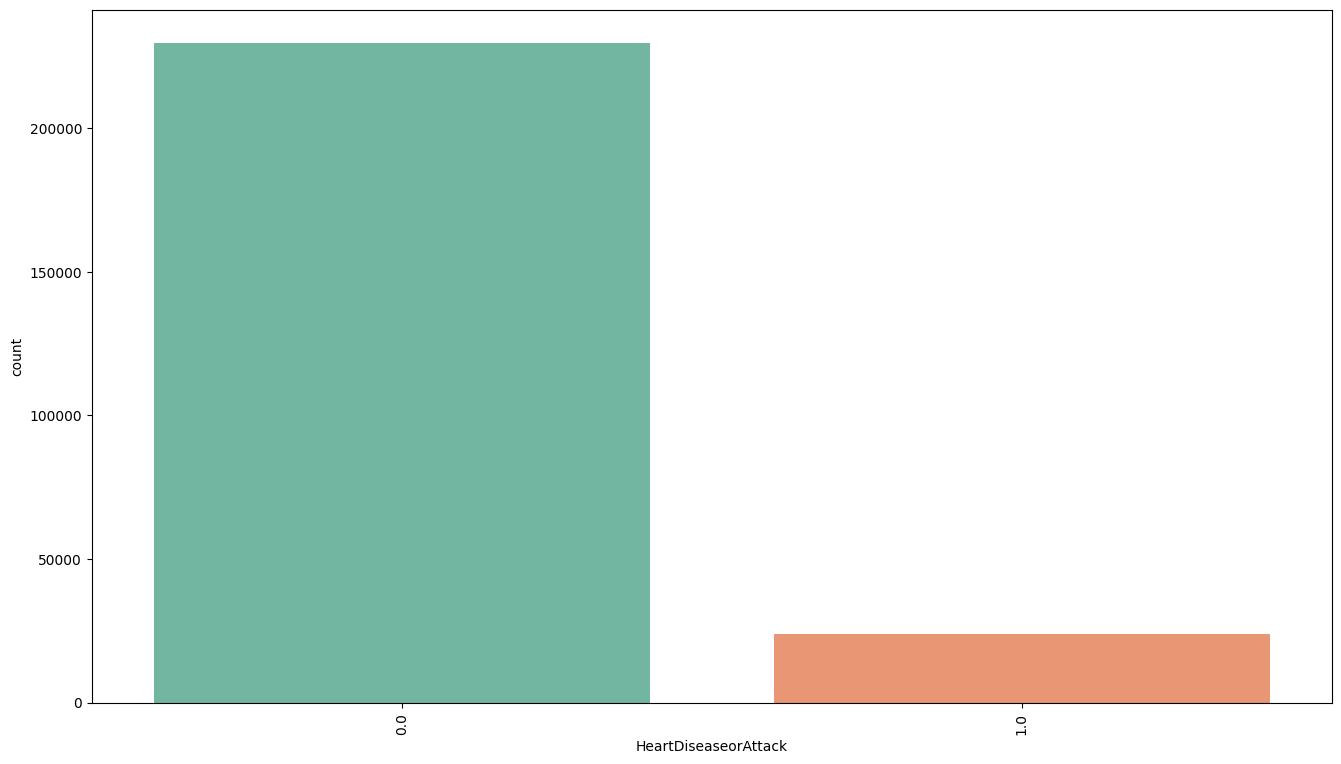

Axes(0.125,0.11;0.775x0.77)


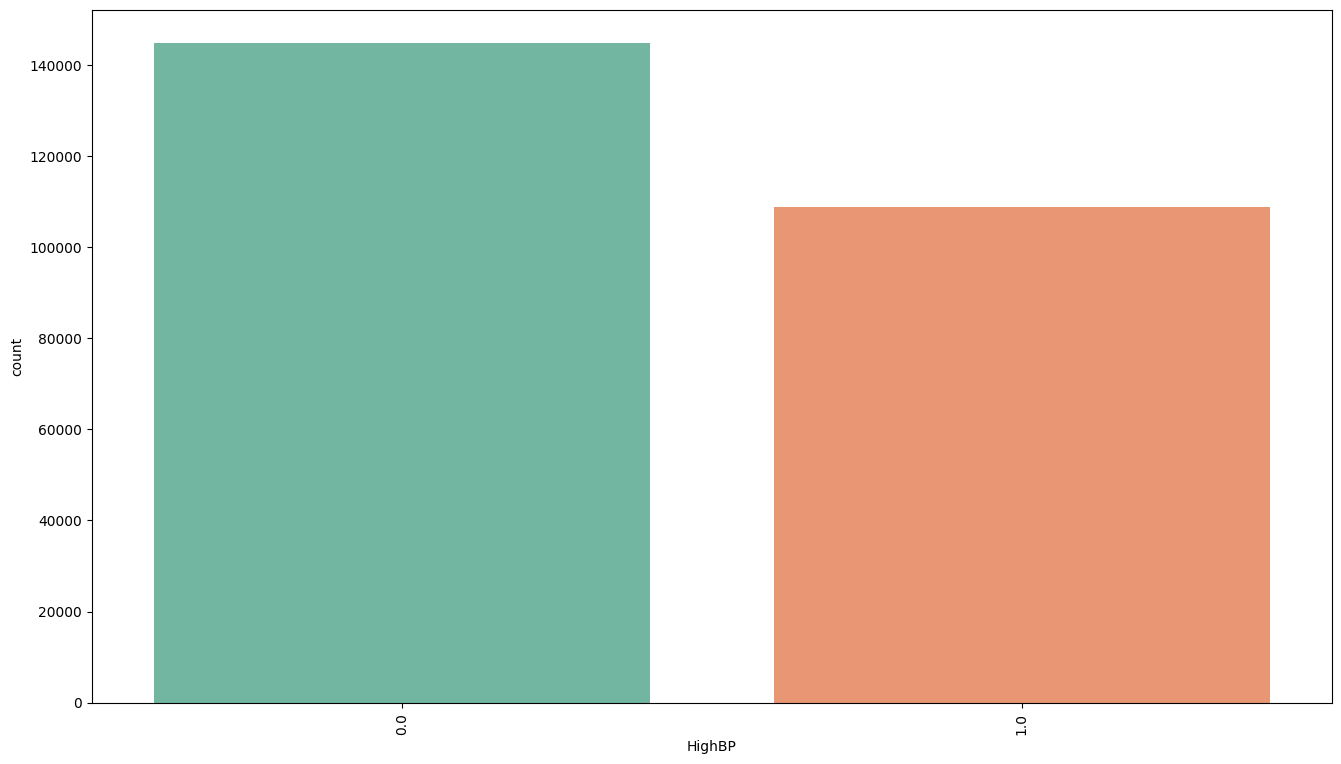

Axes(0.125,0.11;0.775x0.77)


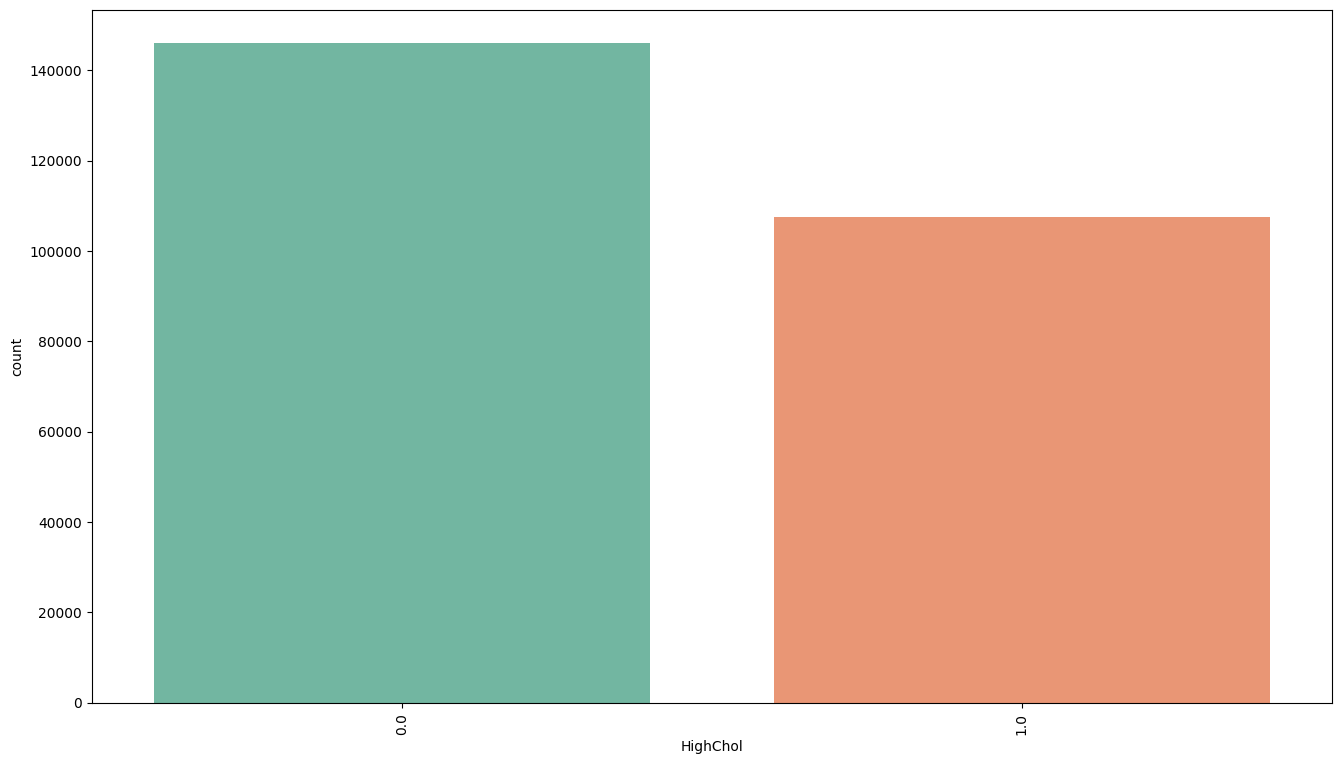

Axes(0.125,0.11;0.775x0.77)


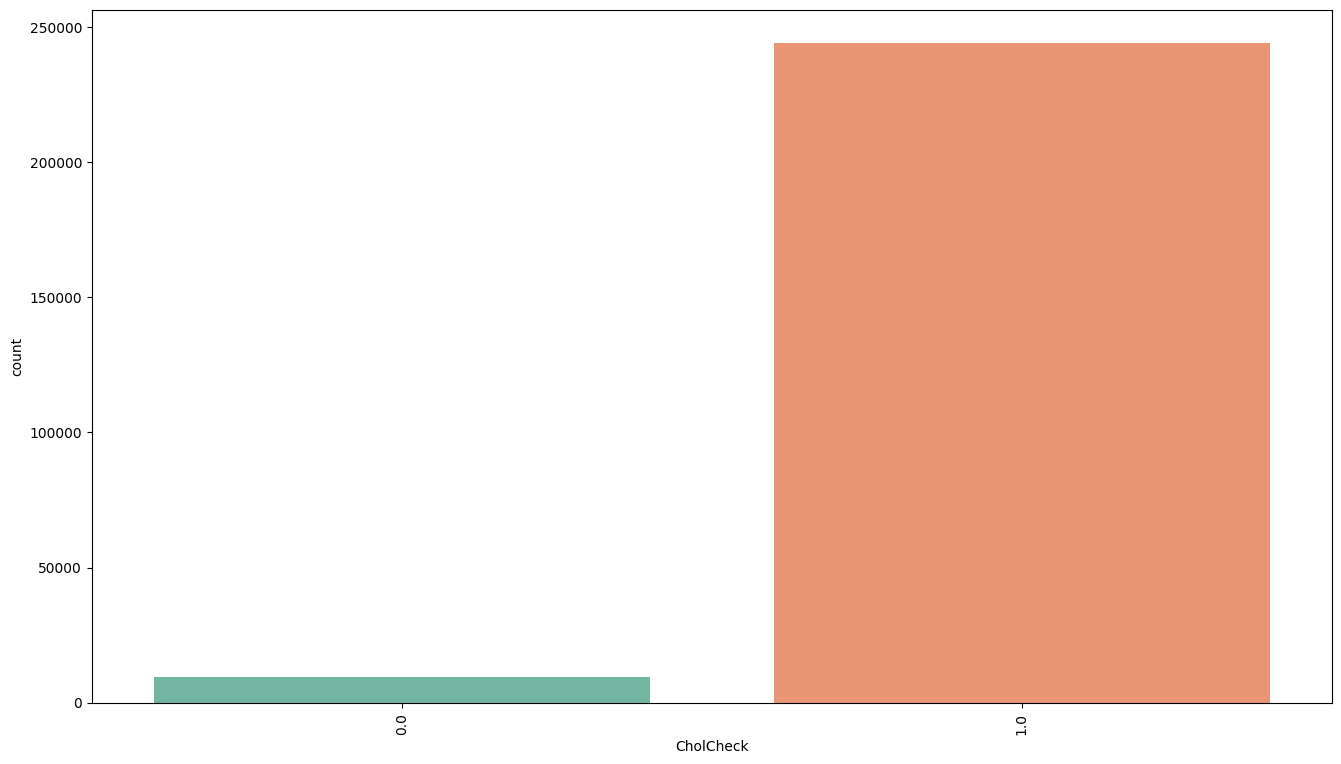

Axes(0.125,0.11;0.775x0.77)


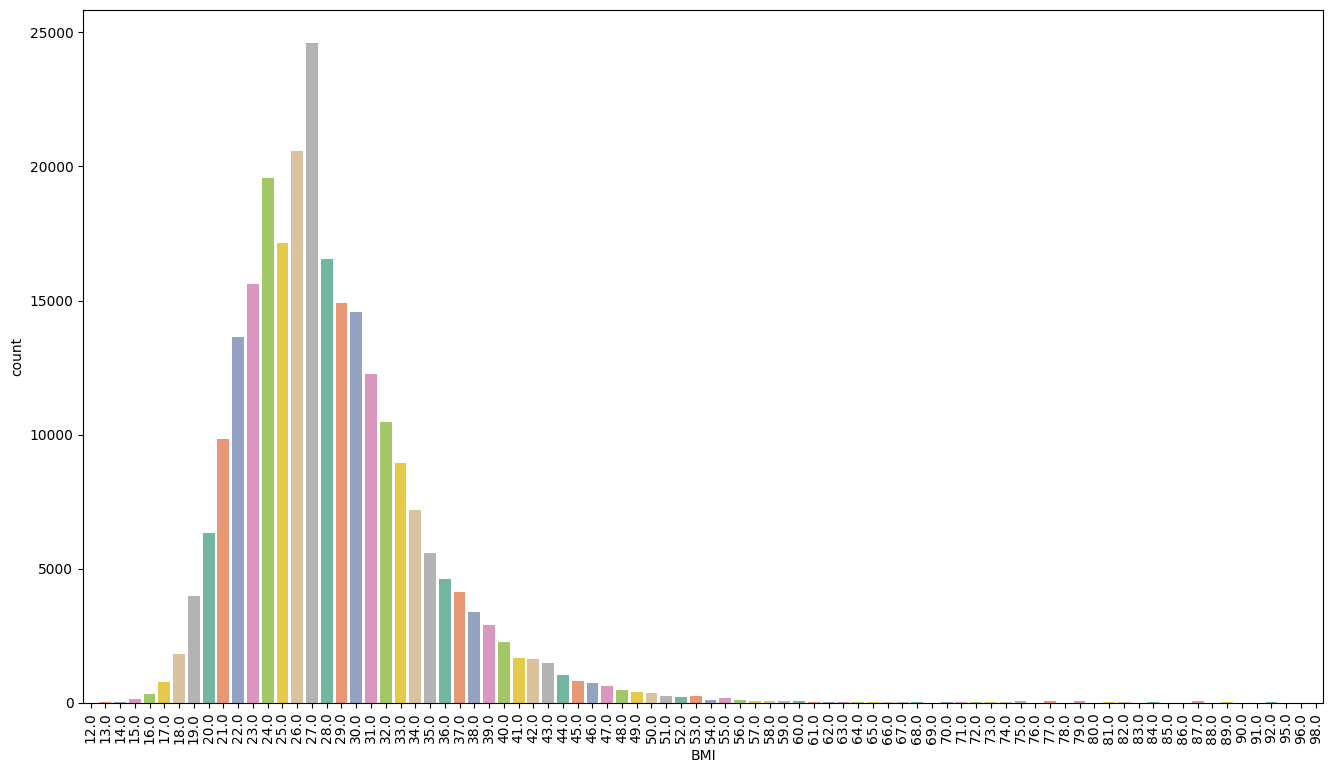

Axes(0.125,0.11;0.775x0.77)


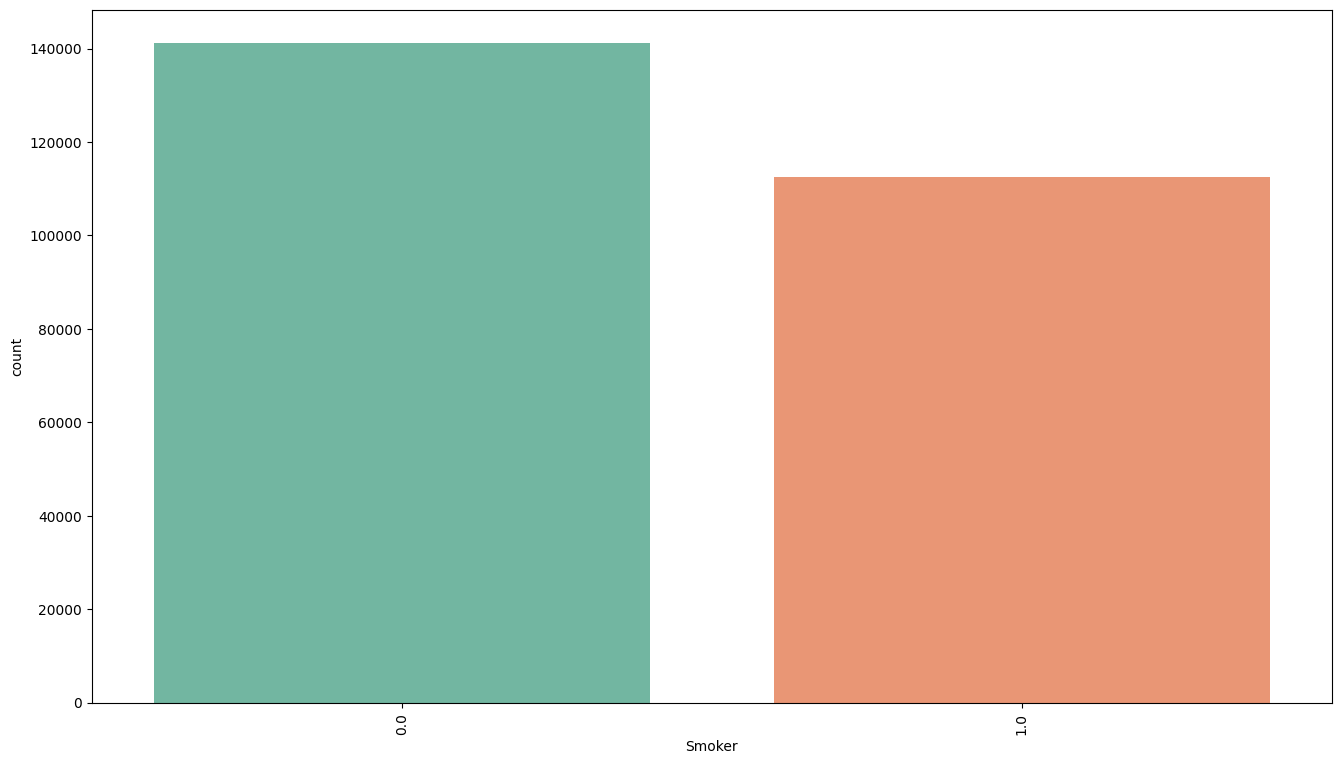

Axes(0.125,0.11;0.775x0.77)


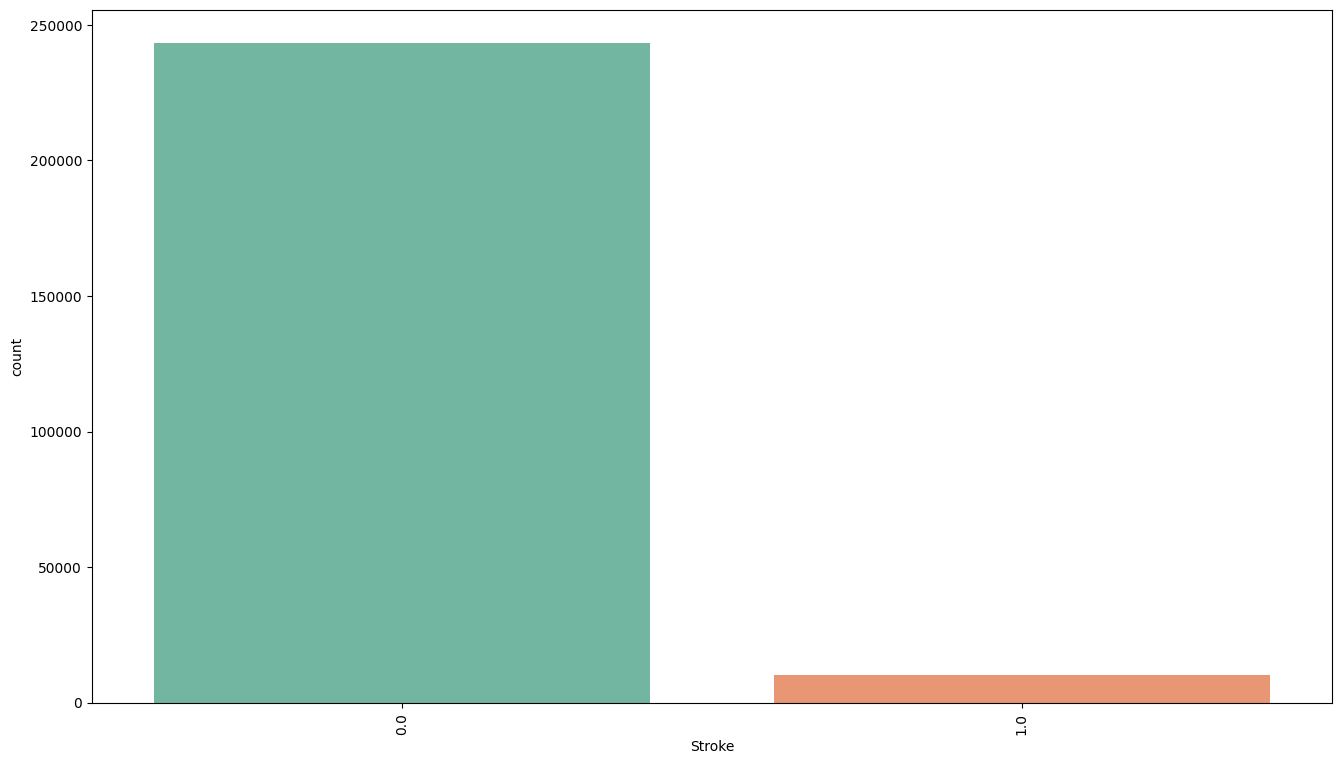

Axes(0.125,0.11;0.775x0.77)


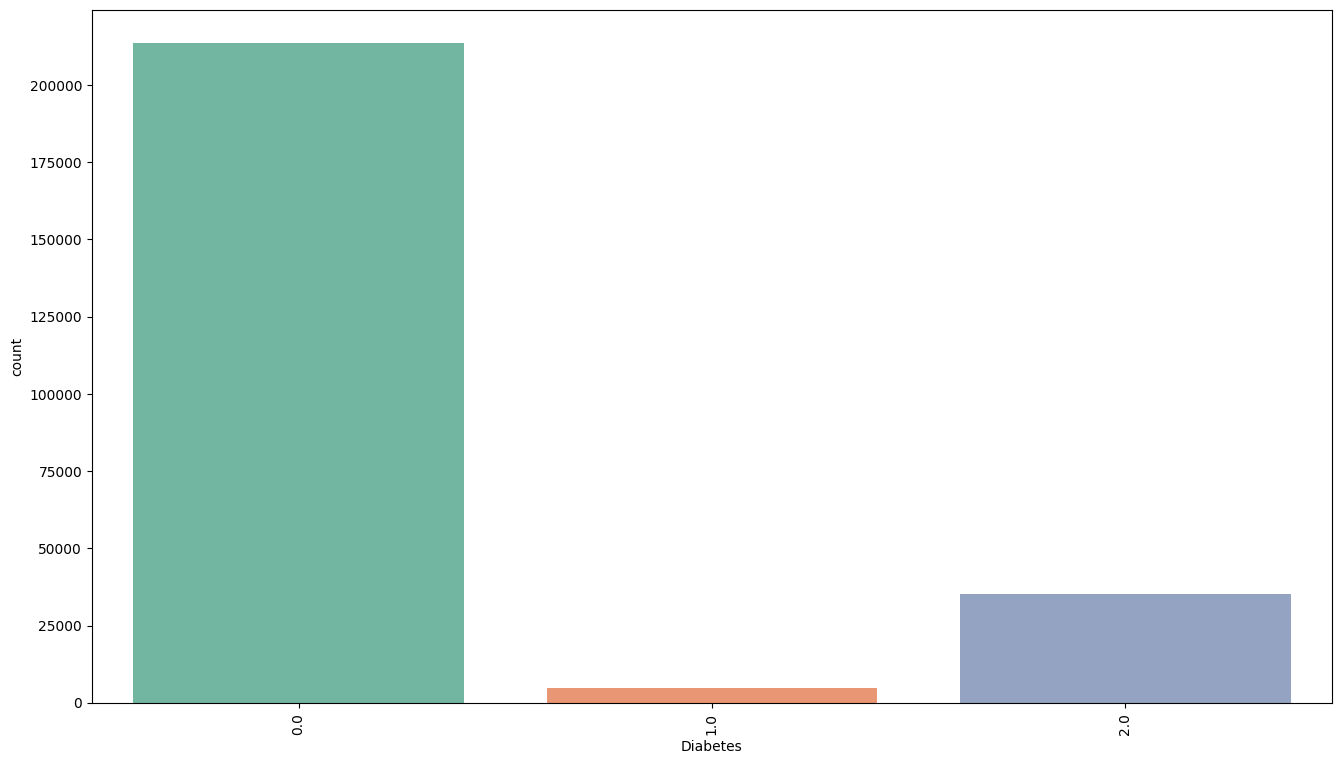

Axes(0.125,0.11;0.775x0.77)


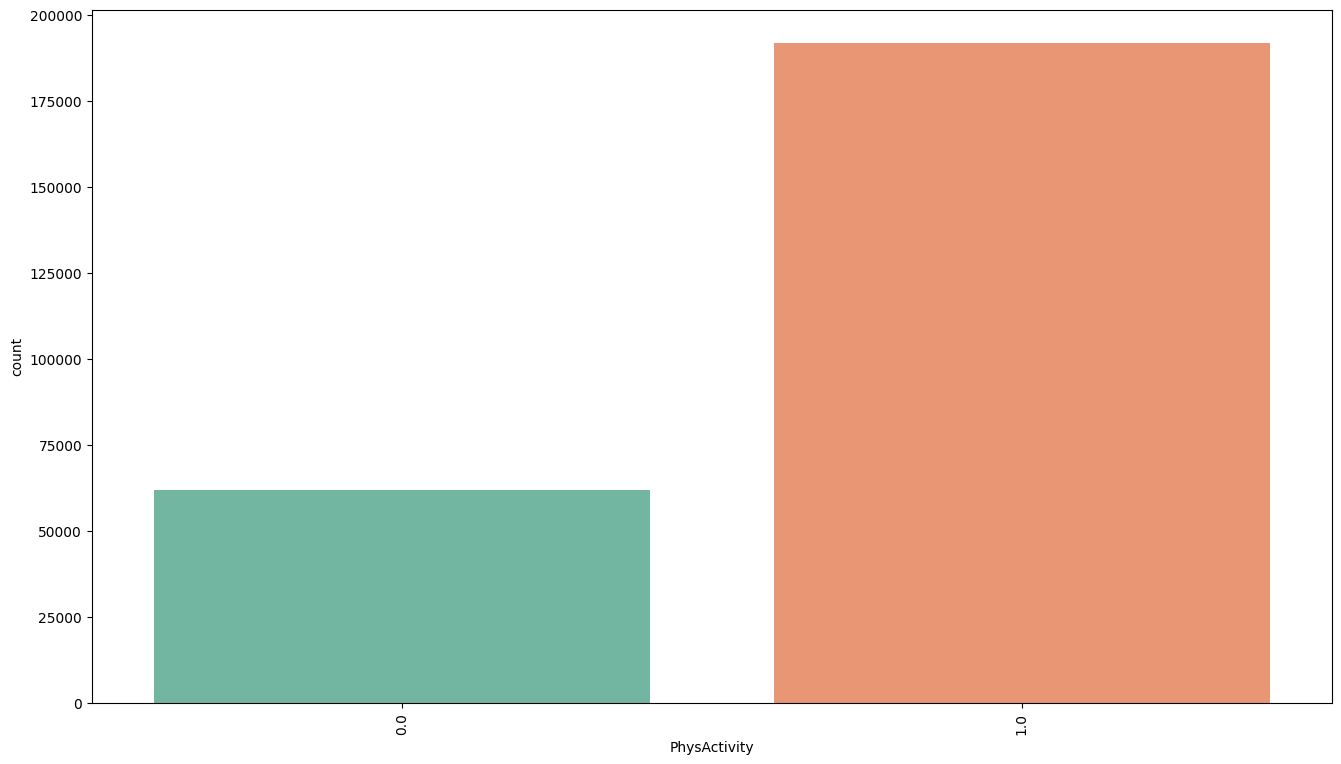

Axes(0.125,0.11;0.775x0.77)


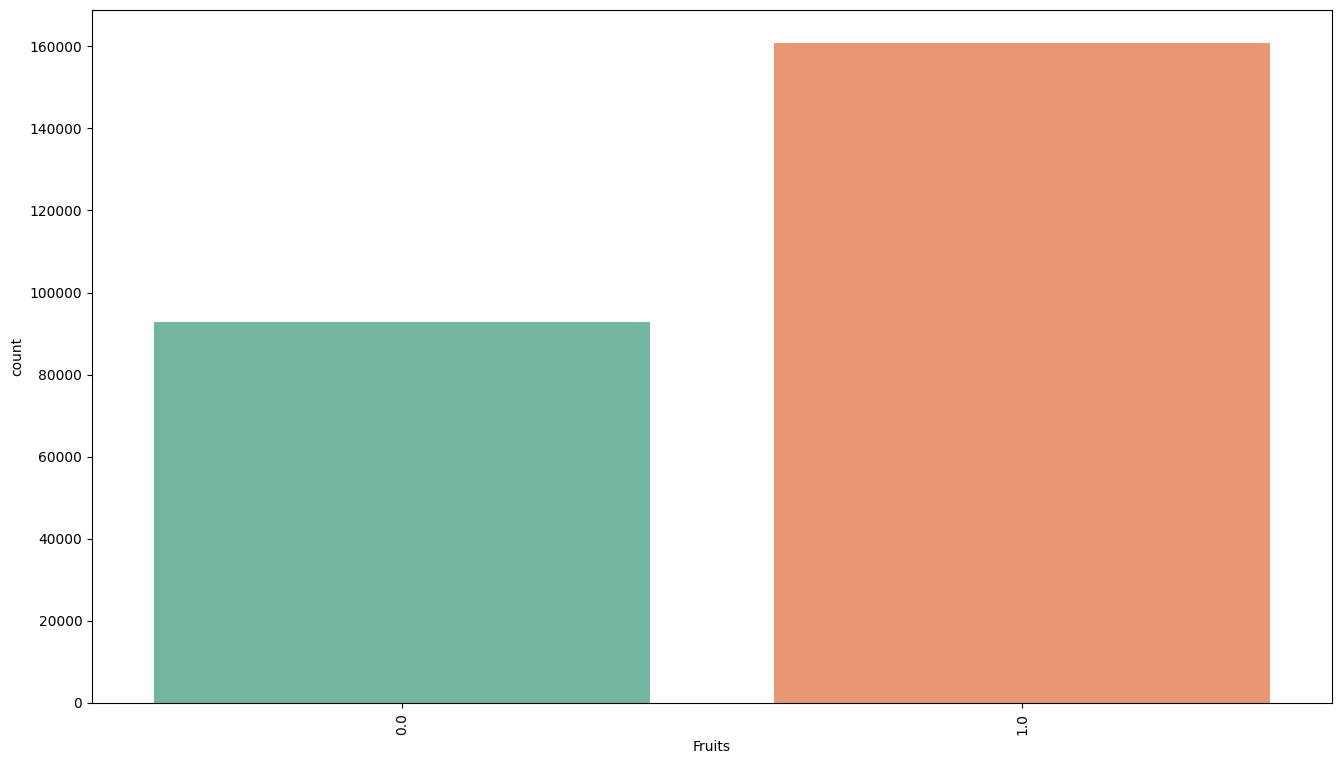

Axes(0.125,0.11;0.775x0.77)


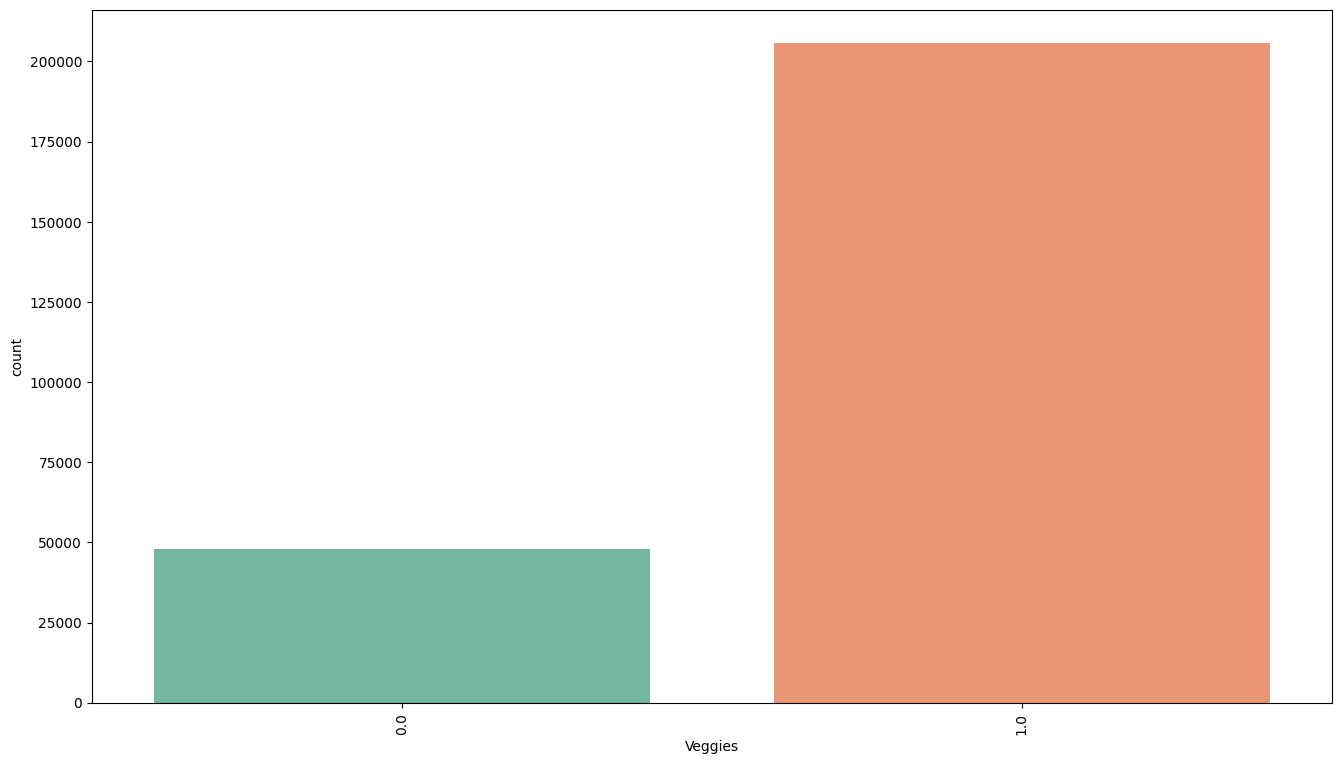

Axes(0.125,0.11;0.775x0.77)


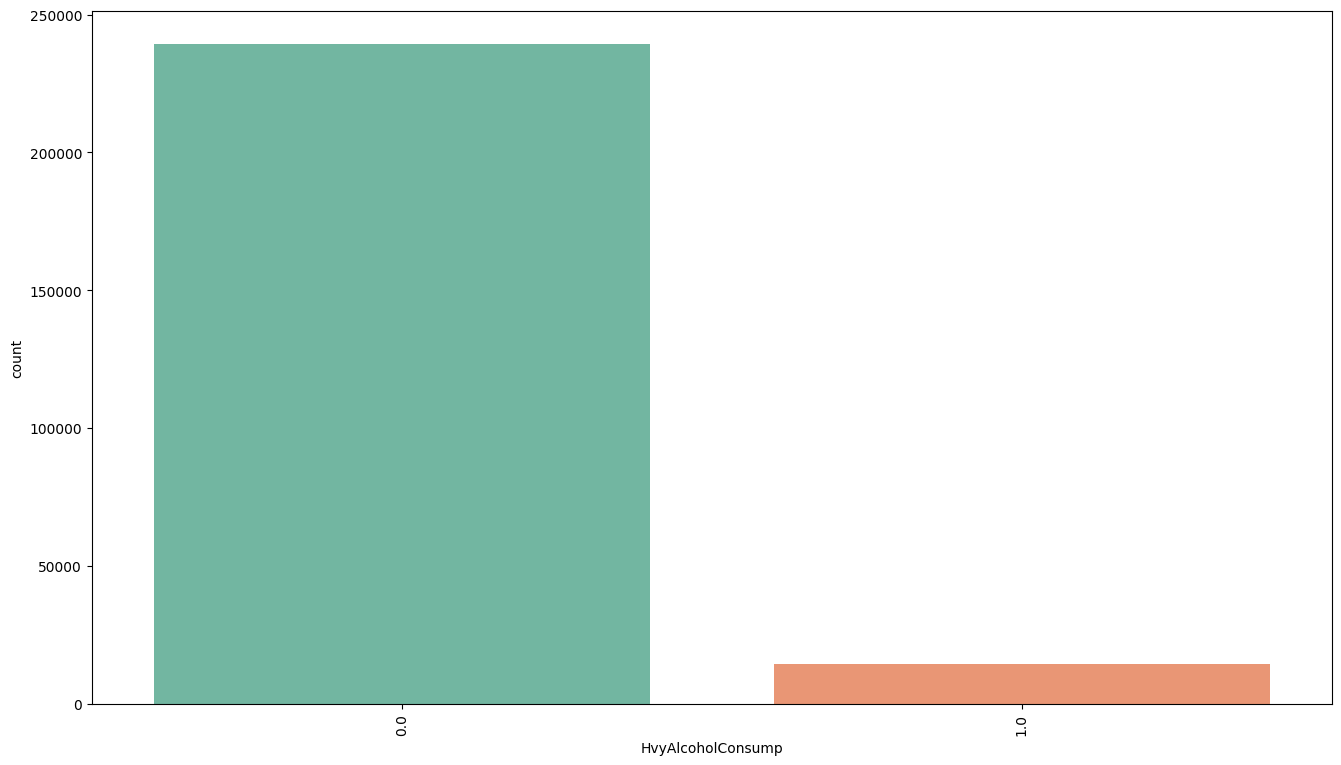

Axes(0.125,0.11;0.775x0.77)


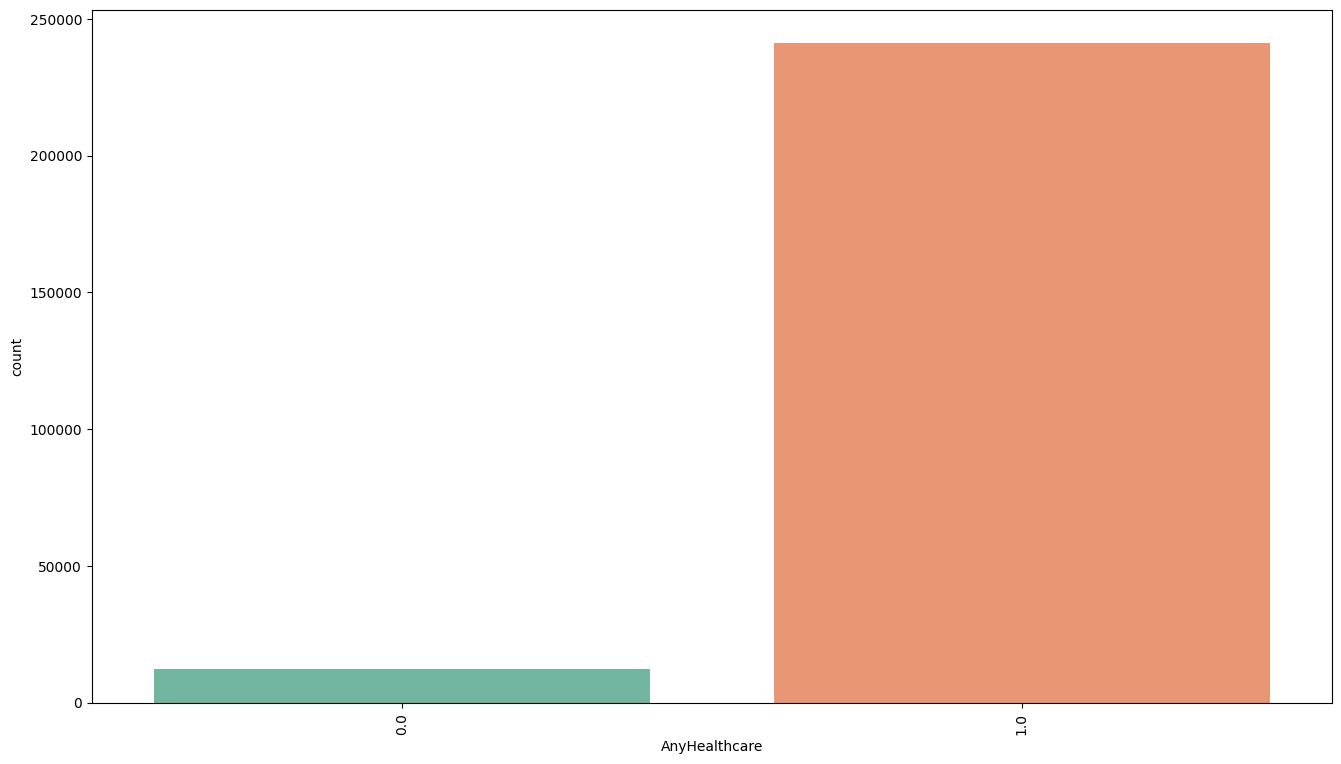

Axes(0.125,0.11;0.775x0.77)


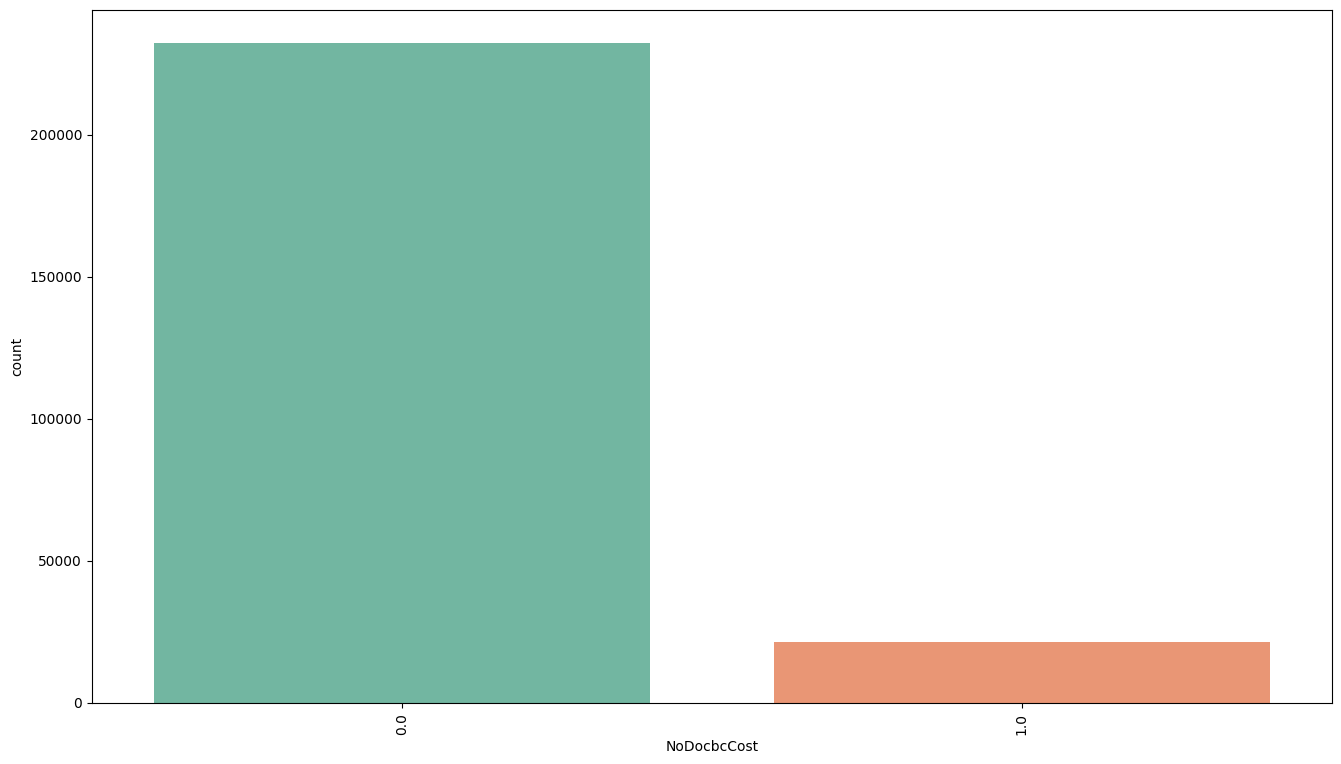

Axes(0.125,0.11;0.775x0.77)


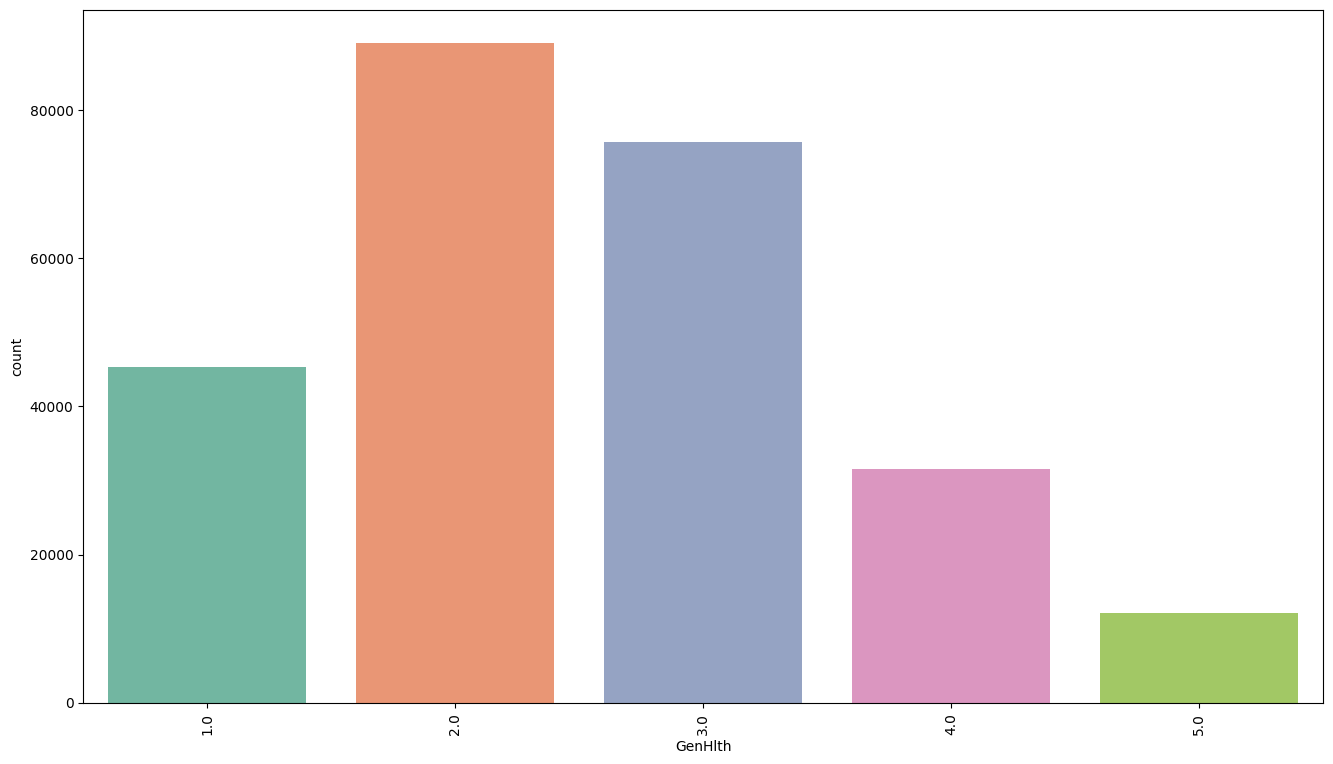

Axes(0.125,0.11;0.775x0.77)


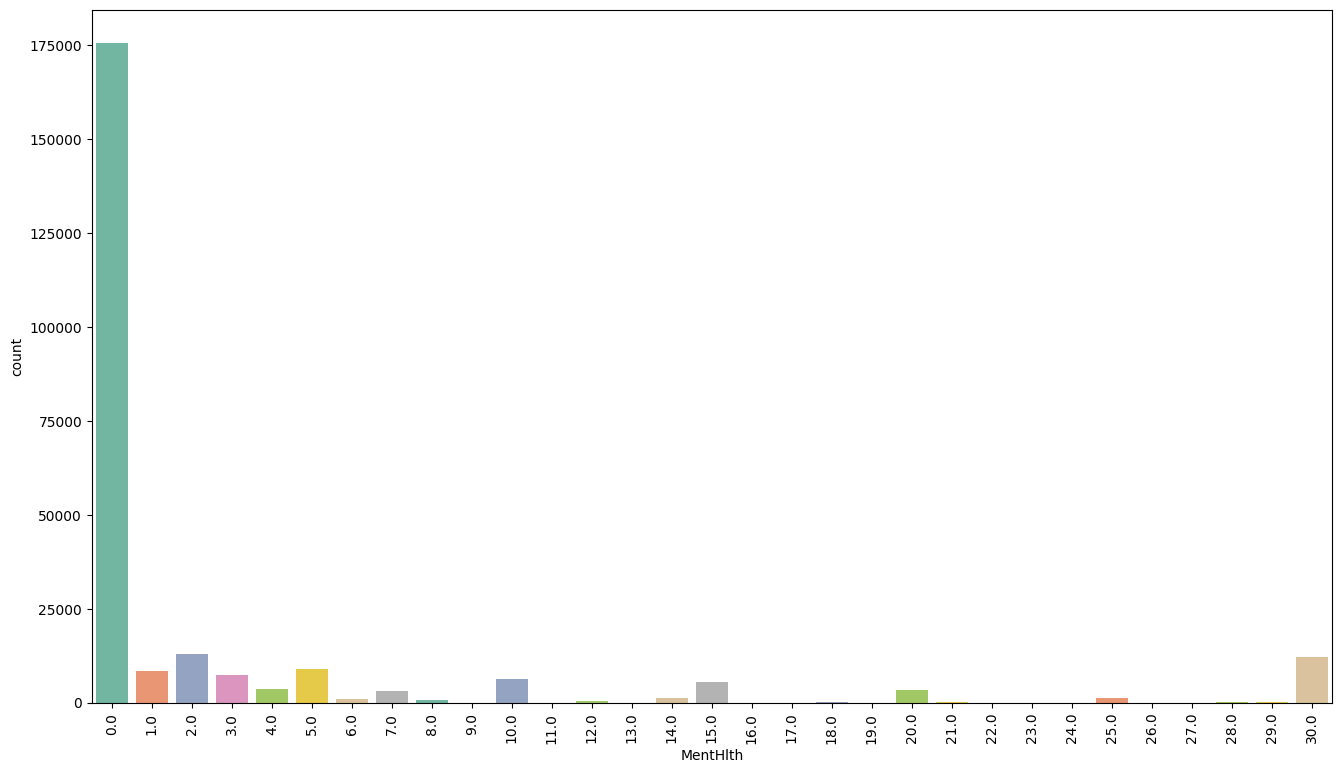

Axes(0.125,0.11;0.775x0.77)


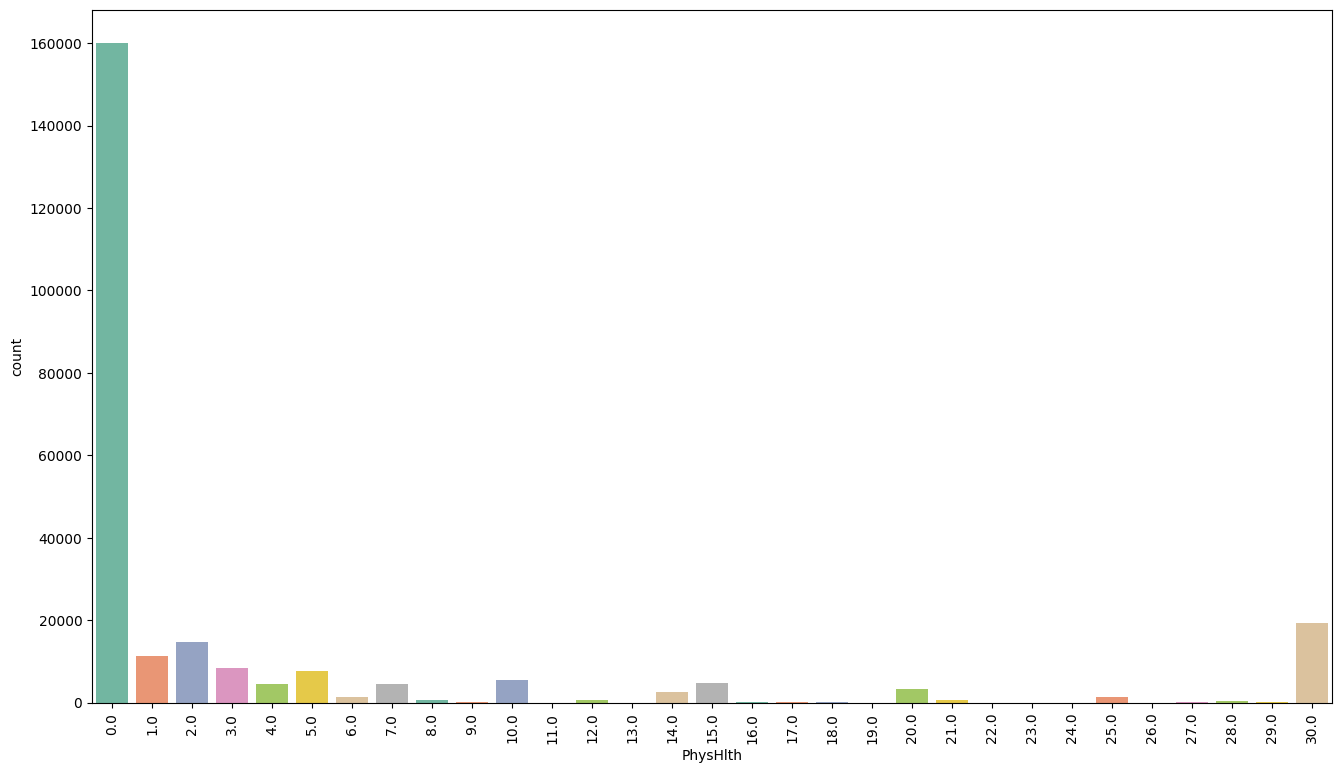

Axes(0.125,0.11;0.775x0.77)


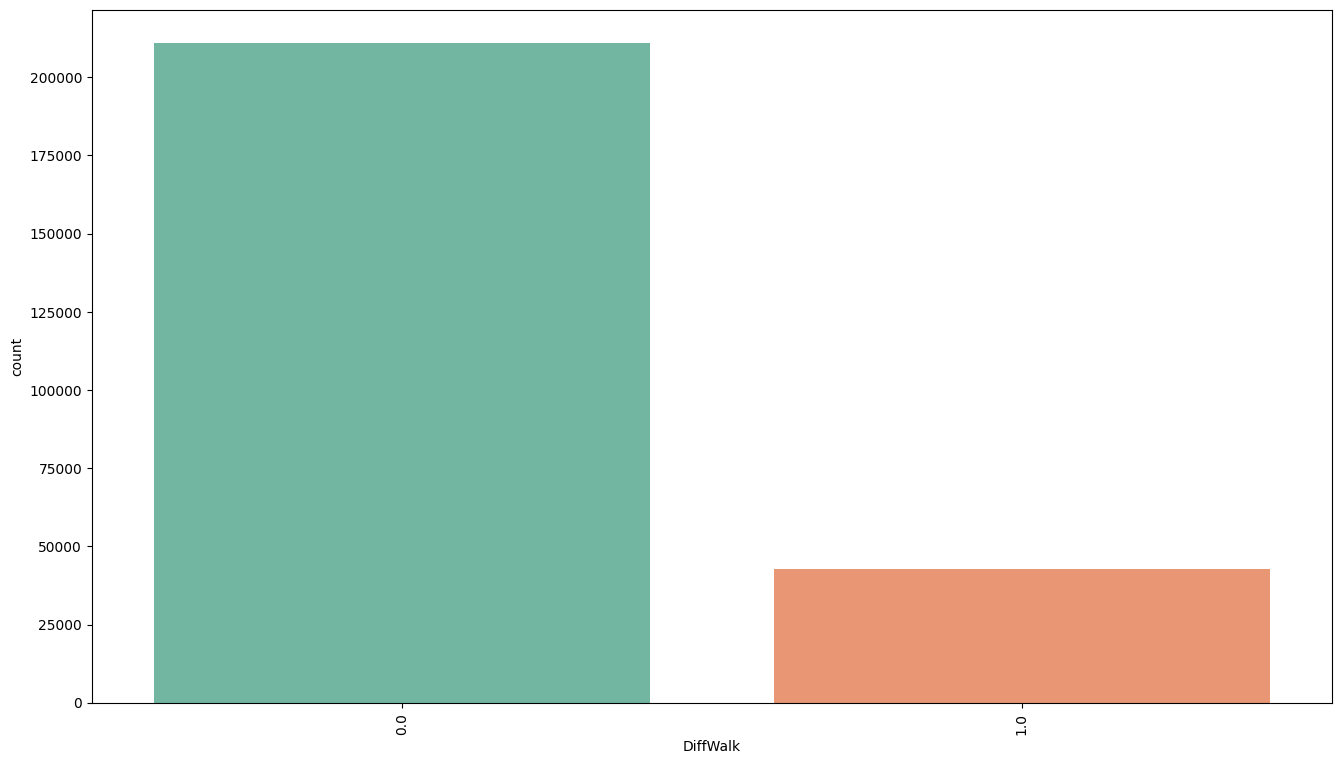

Axes(0.125,0.11;0.775x0.77)


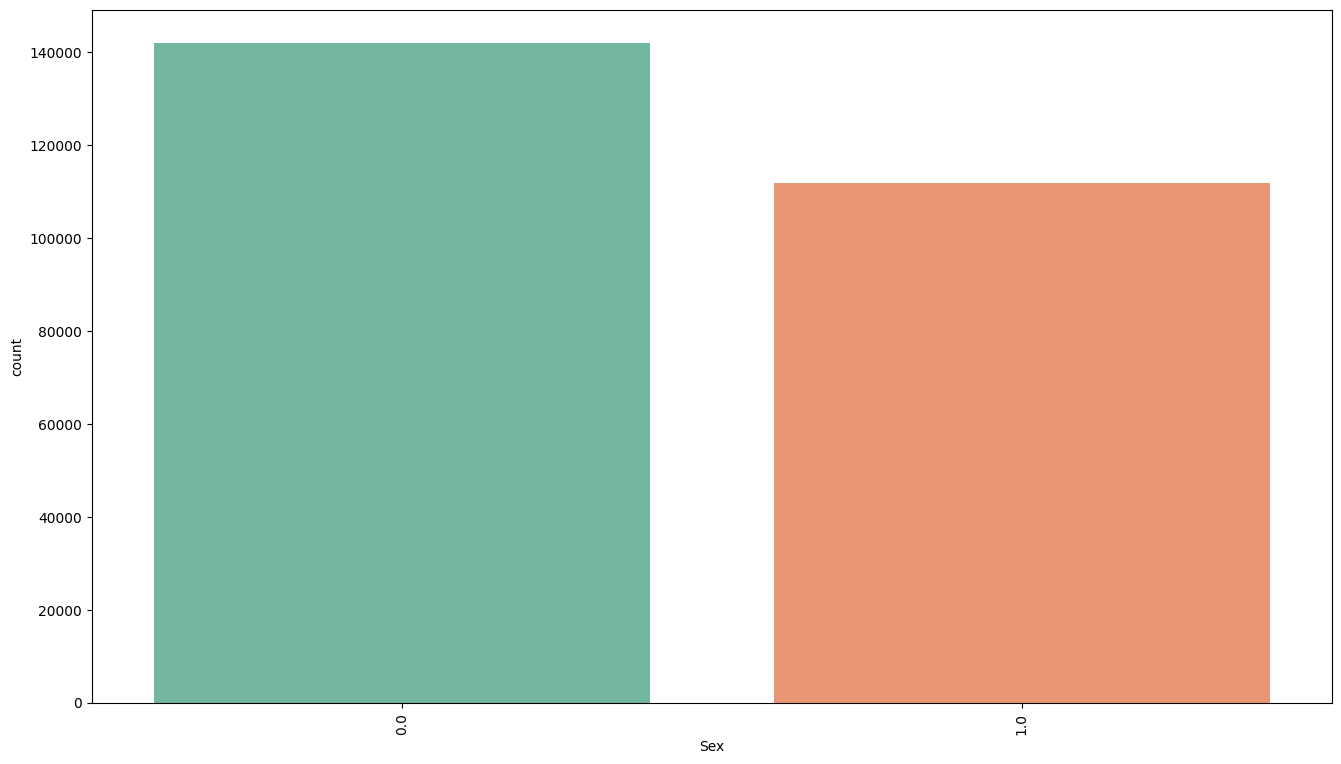

Axes(0.125,0.11;0.775x0.77)


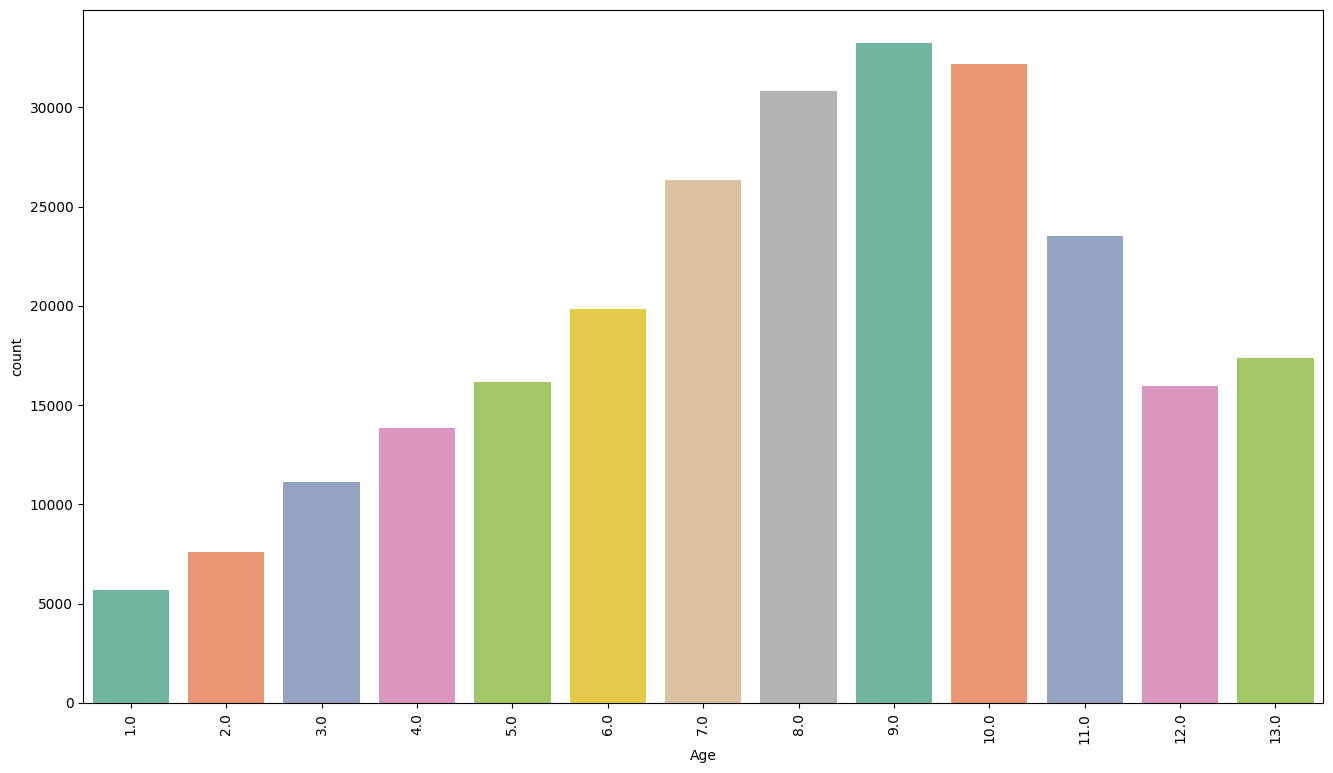

Axes(0.125,0.11;0.775x0.77)


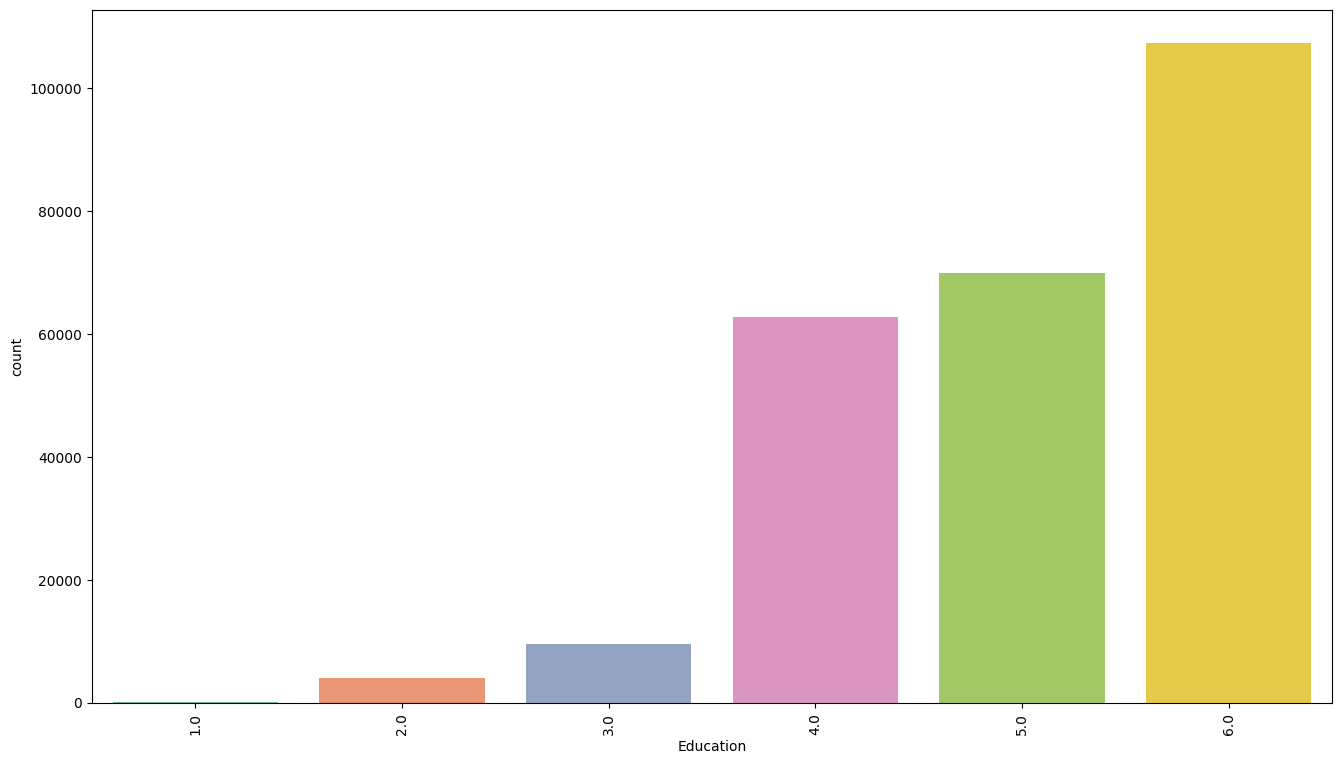

Axes(0.125,0.11;0.775x0.77)


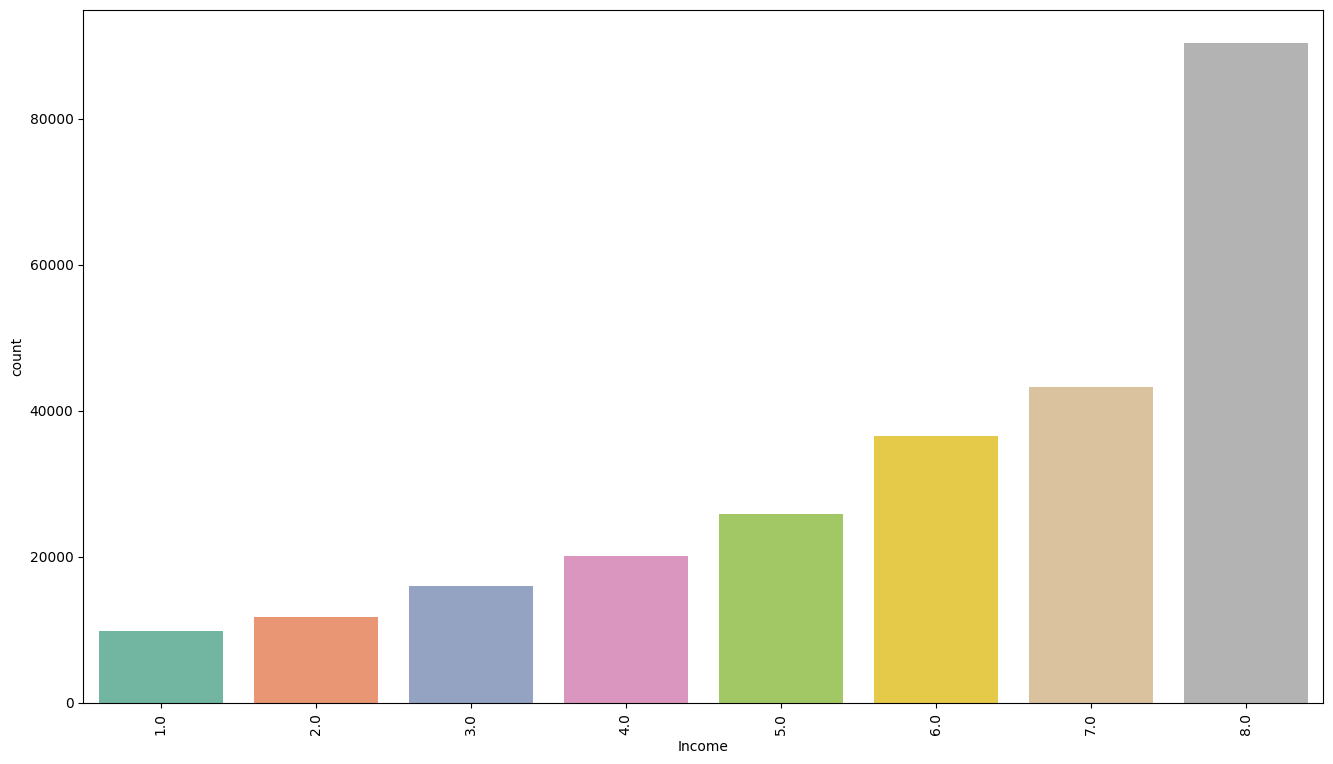

In [5]:
for i in heart_data.columns[:]:
    plt.figure(figsize=(16,9))
    print(sns.countplot(x = i , data = heart_data, palette= "Set2" ))
    plt.xticks(rotation=90)
    plt.show()

Dağılımlara baktığımızda önemli bir nokta, nüfus dağılımındaki yaşlıların ve yüksek gelirlilerin çoğunluğu.

Bu noktada ise anketlerin telefonla yapılmış olması, örneklem seçimindeki biasların (taraflılık, ön yargı) durumunu açıklayabilir. Analizimizde göz önünde tutmamız gereken bir nokta.



Şimdi de bu verileri bir kez de kalp hastalığı verisi olan HeartDiseaseorAttack değişkenine göre ayırarak görselleştireceğim.

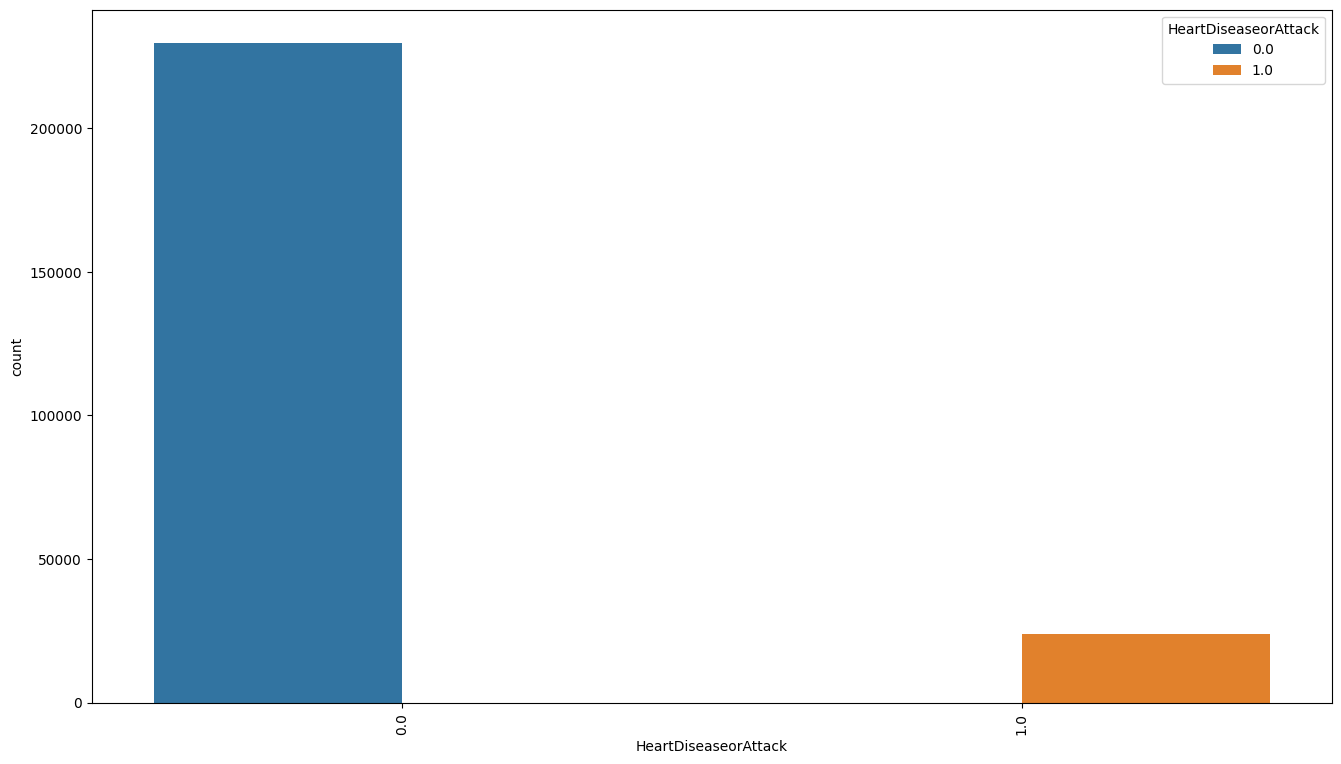

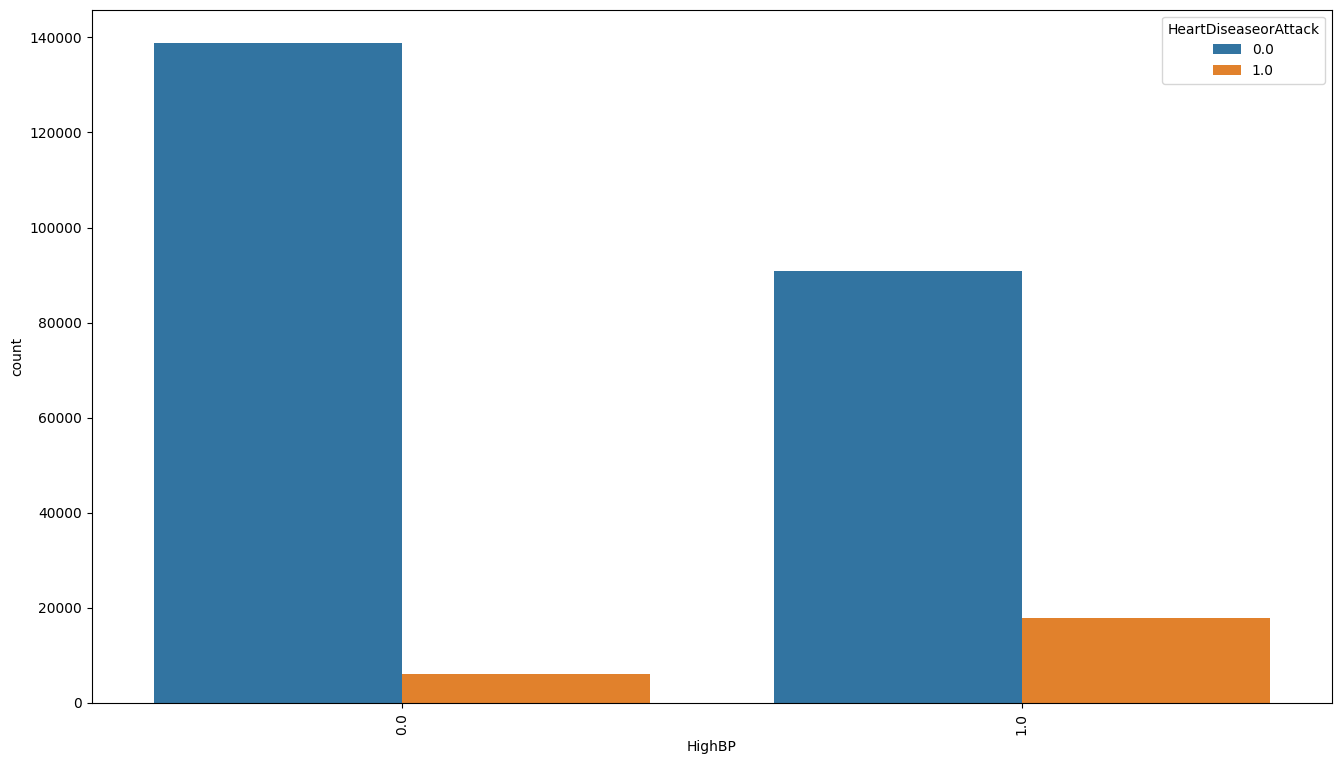

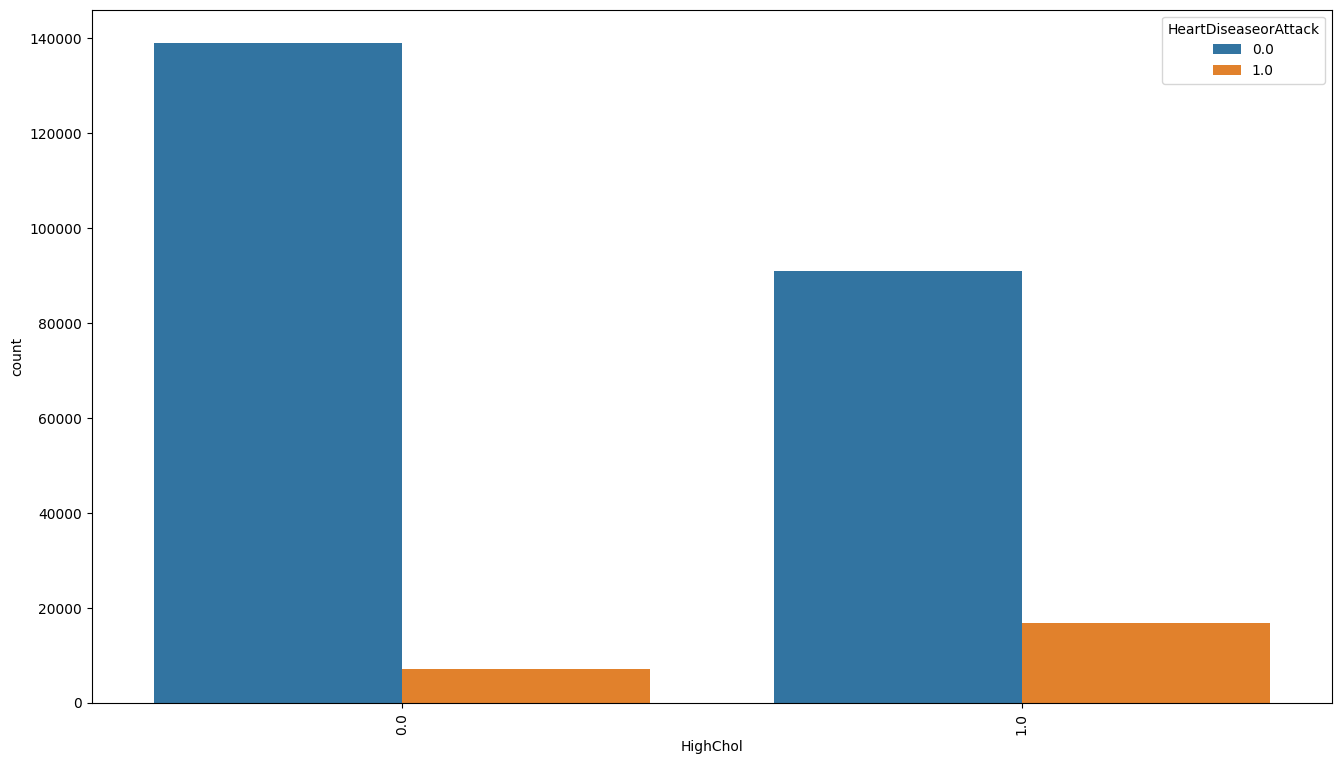

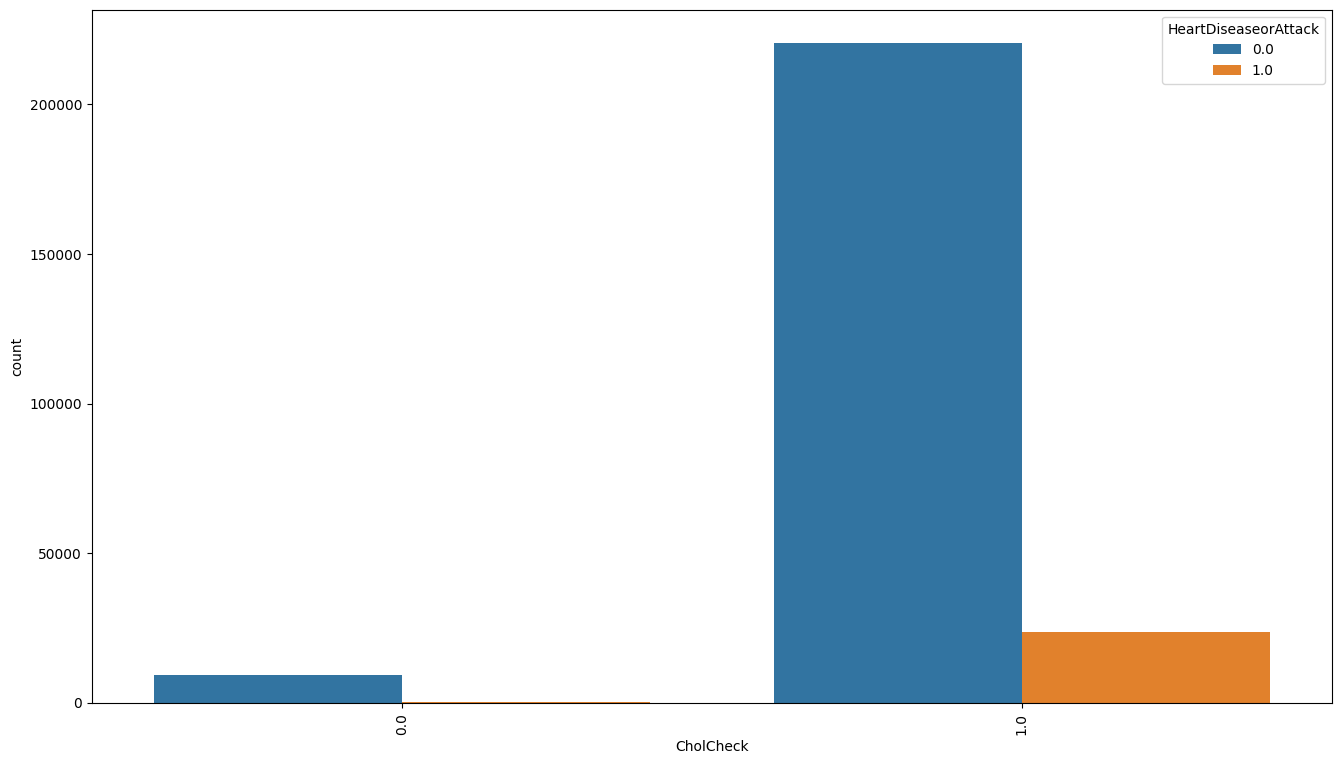

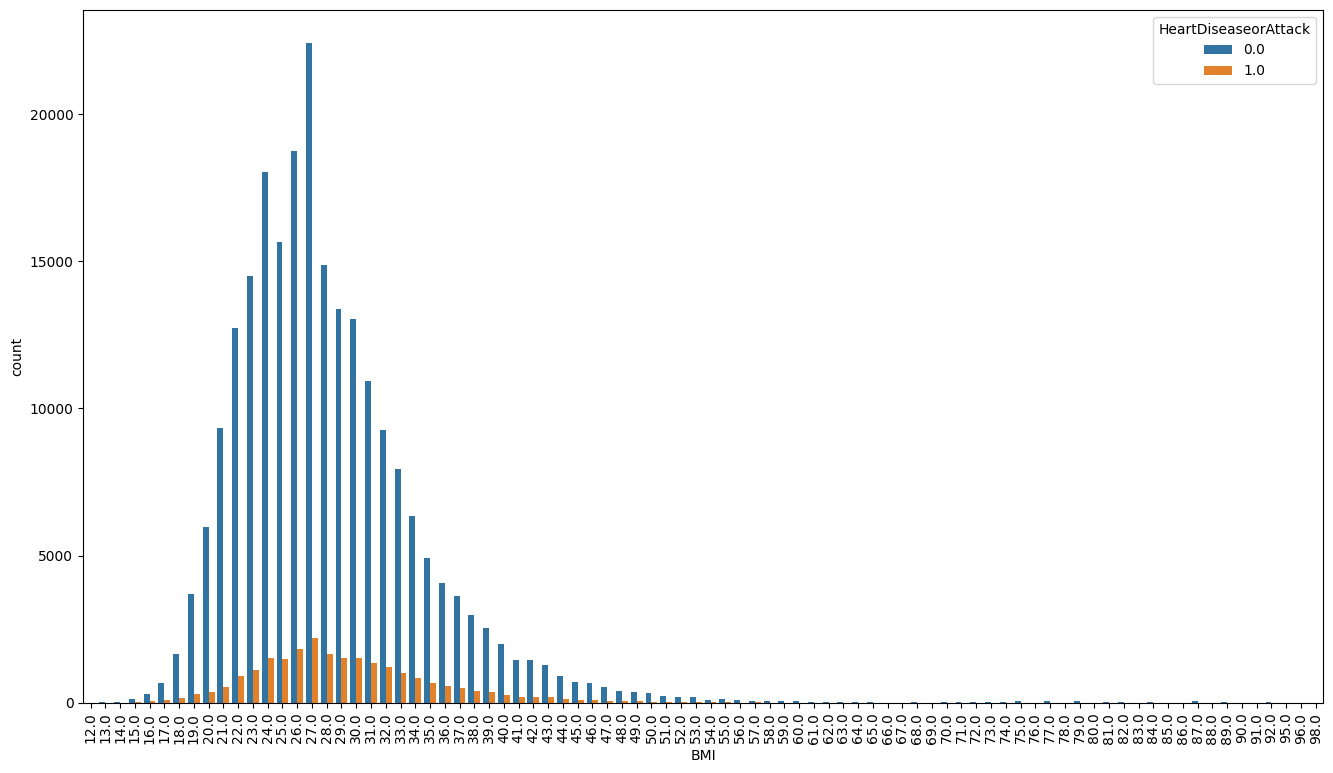

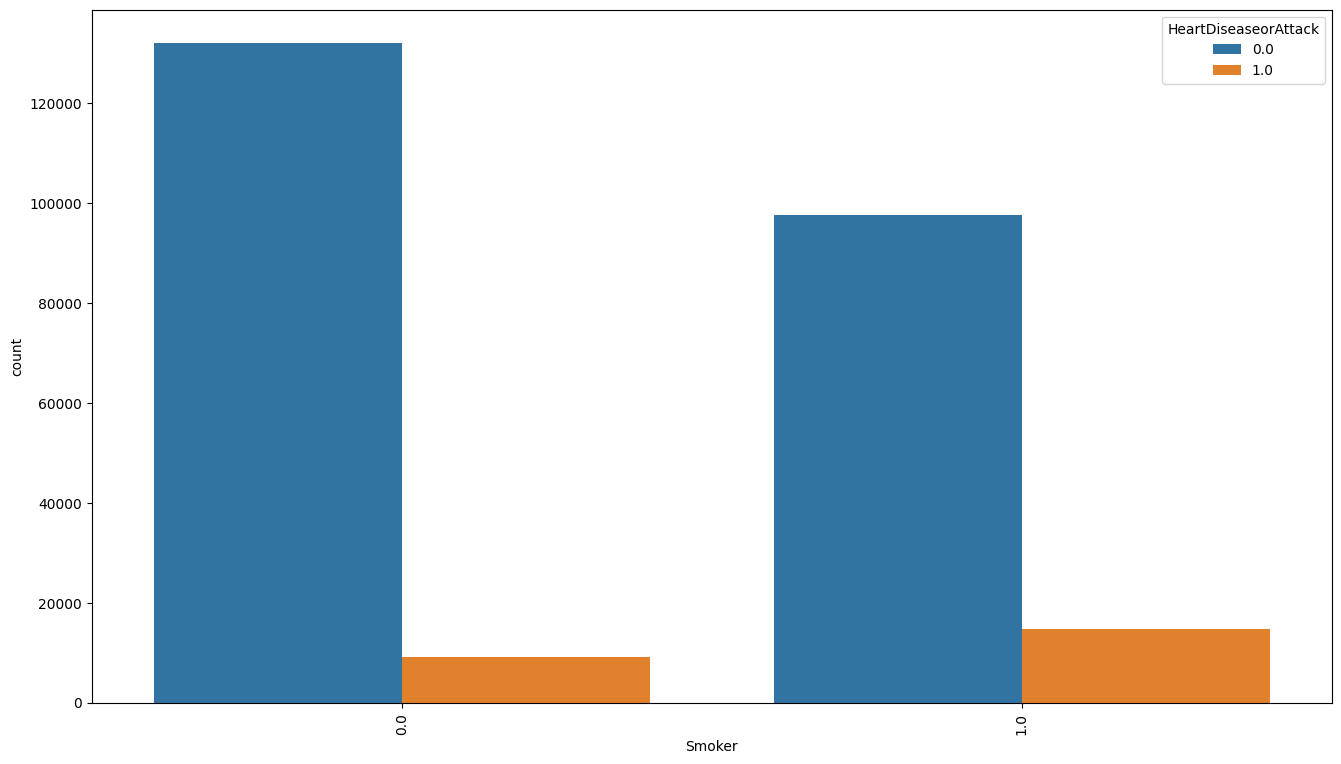

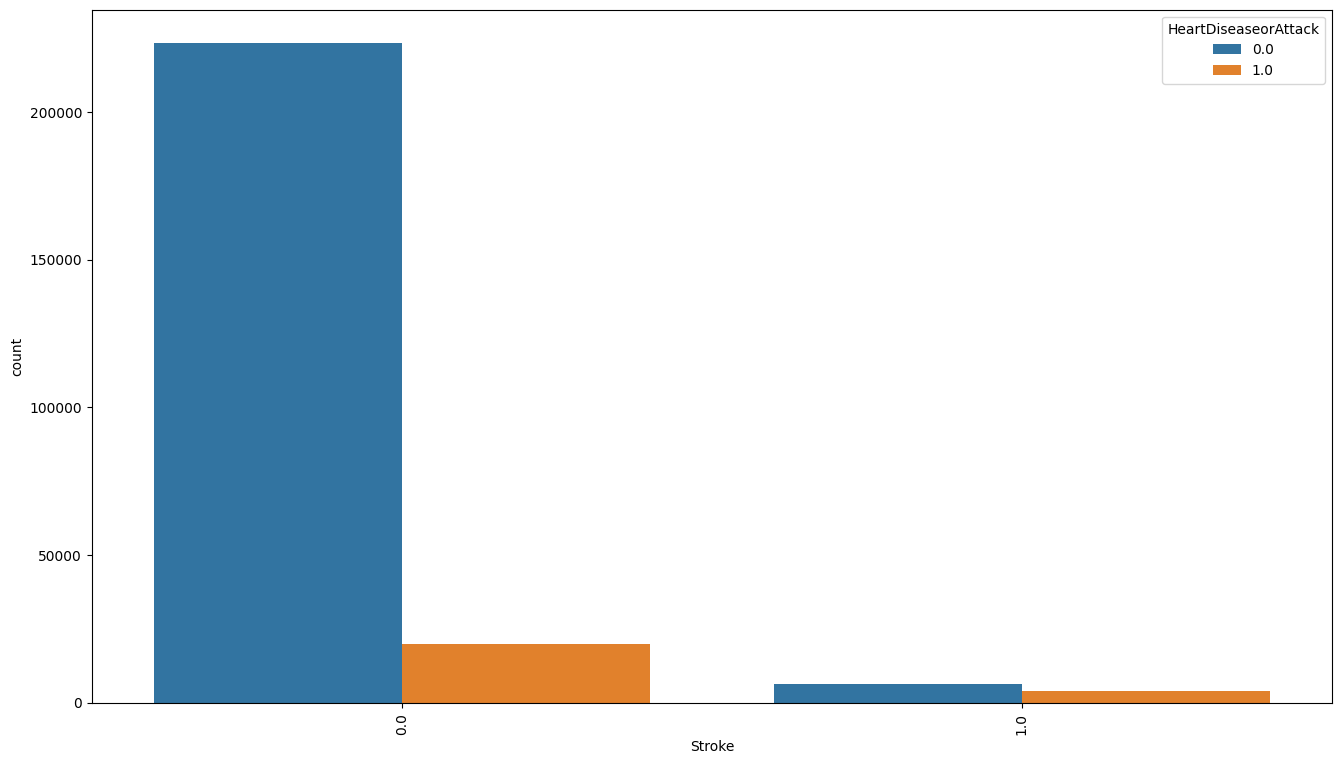

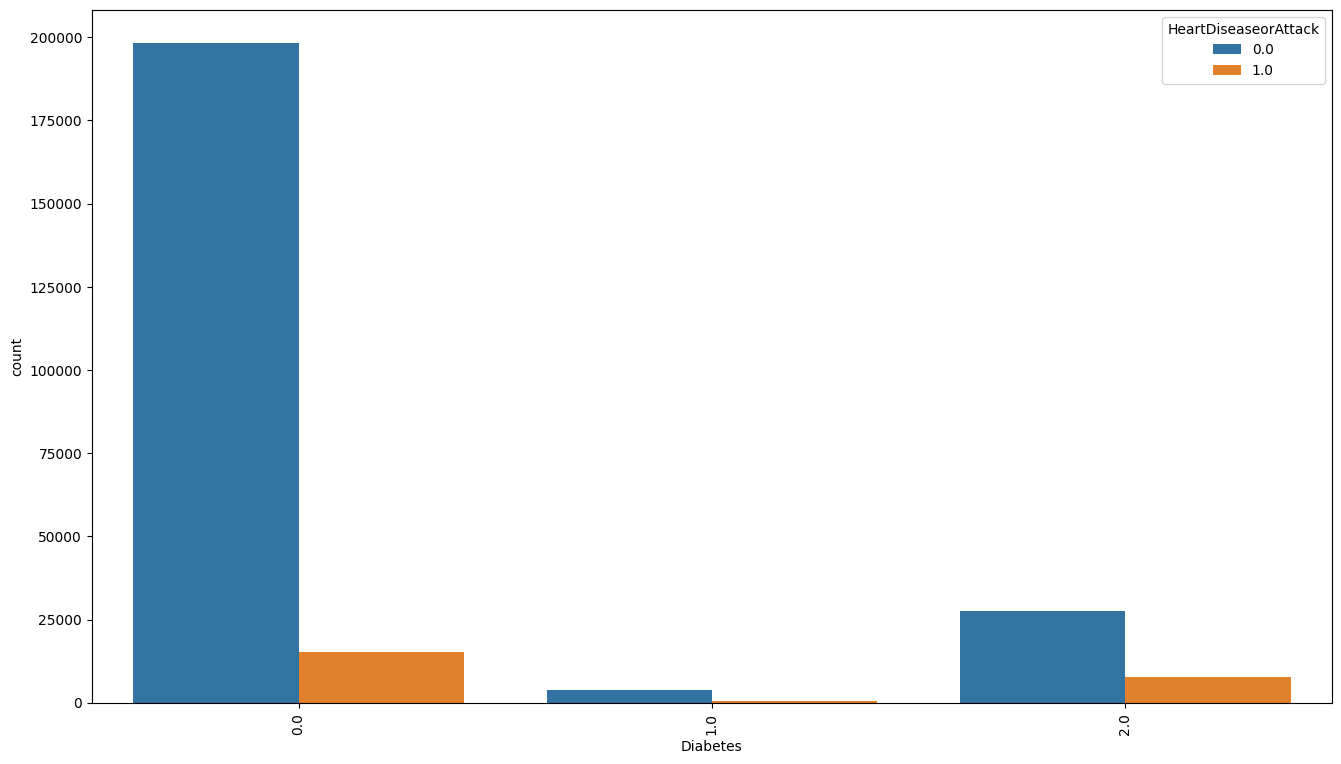

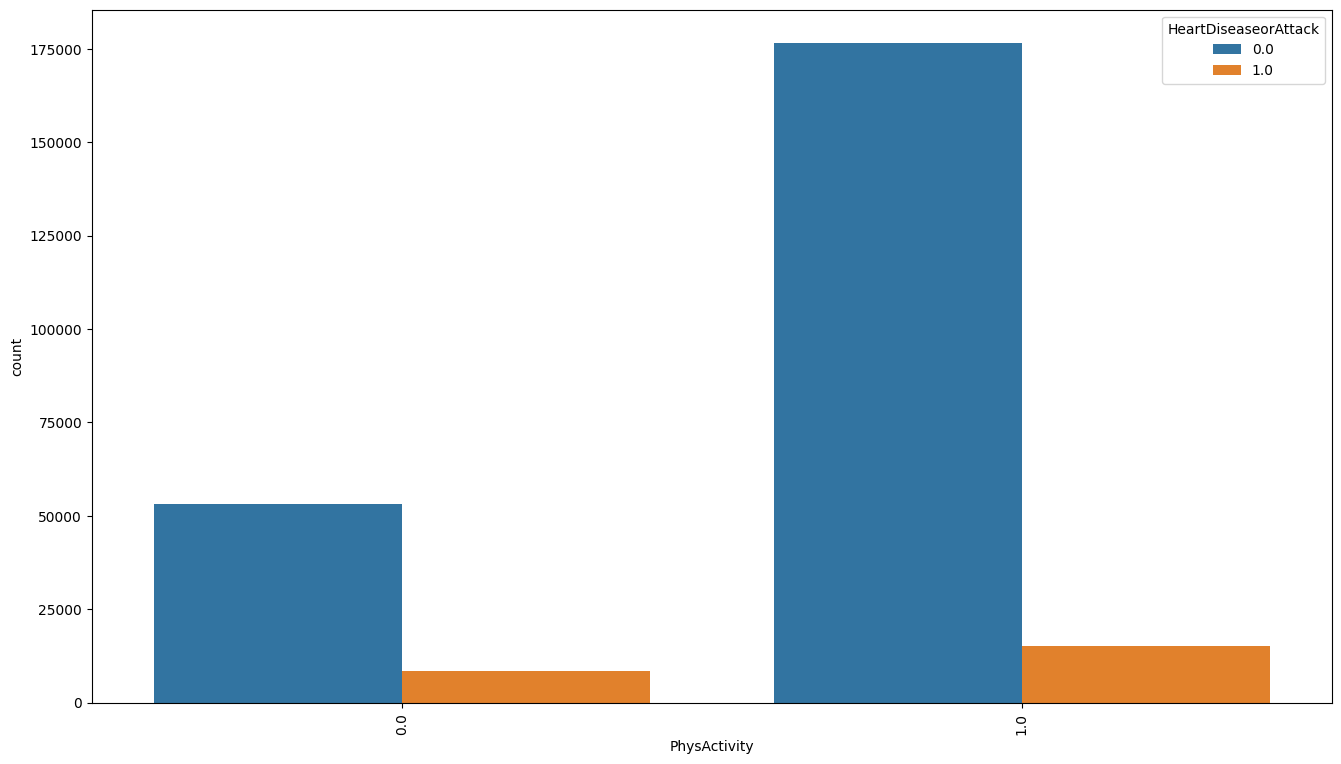

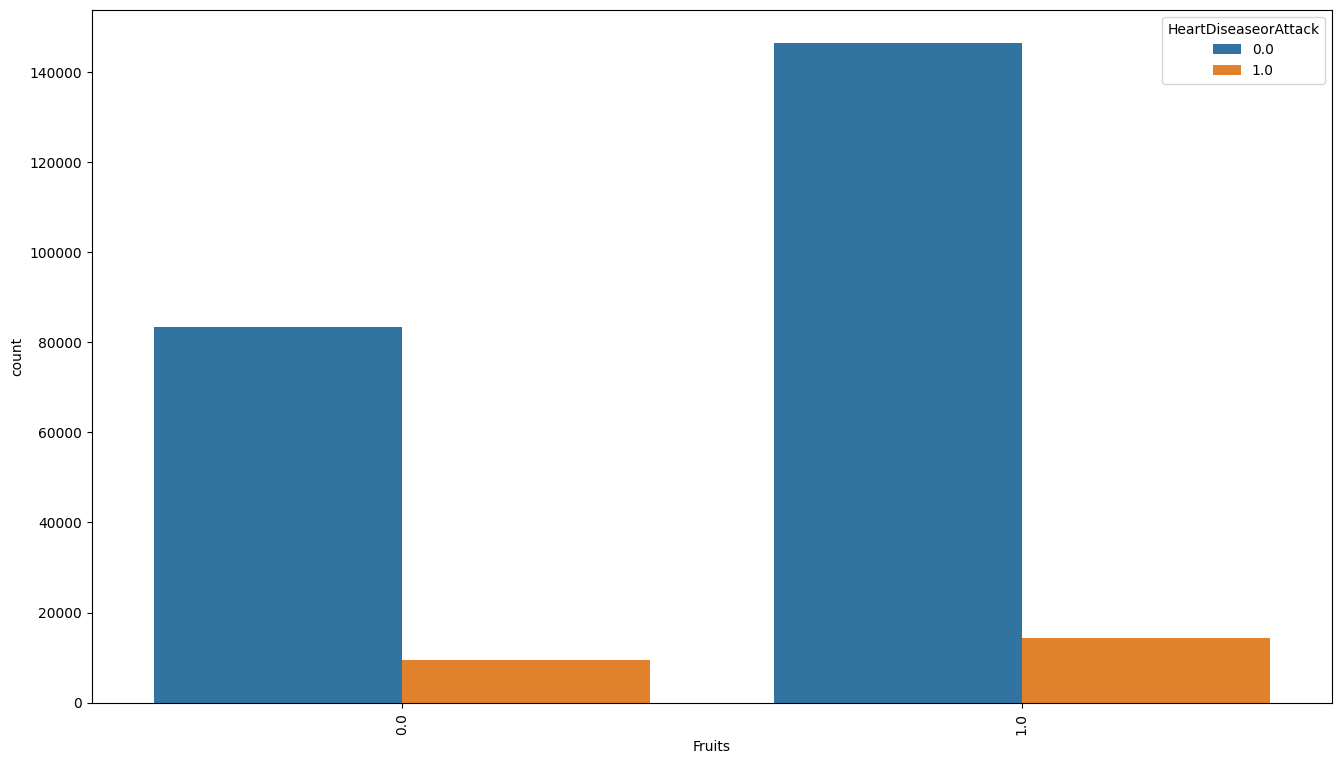

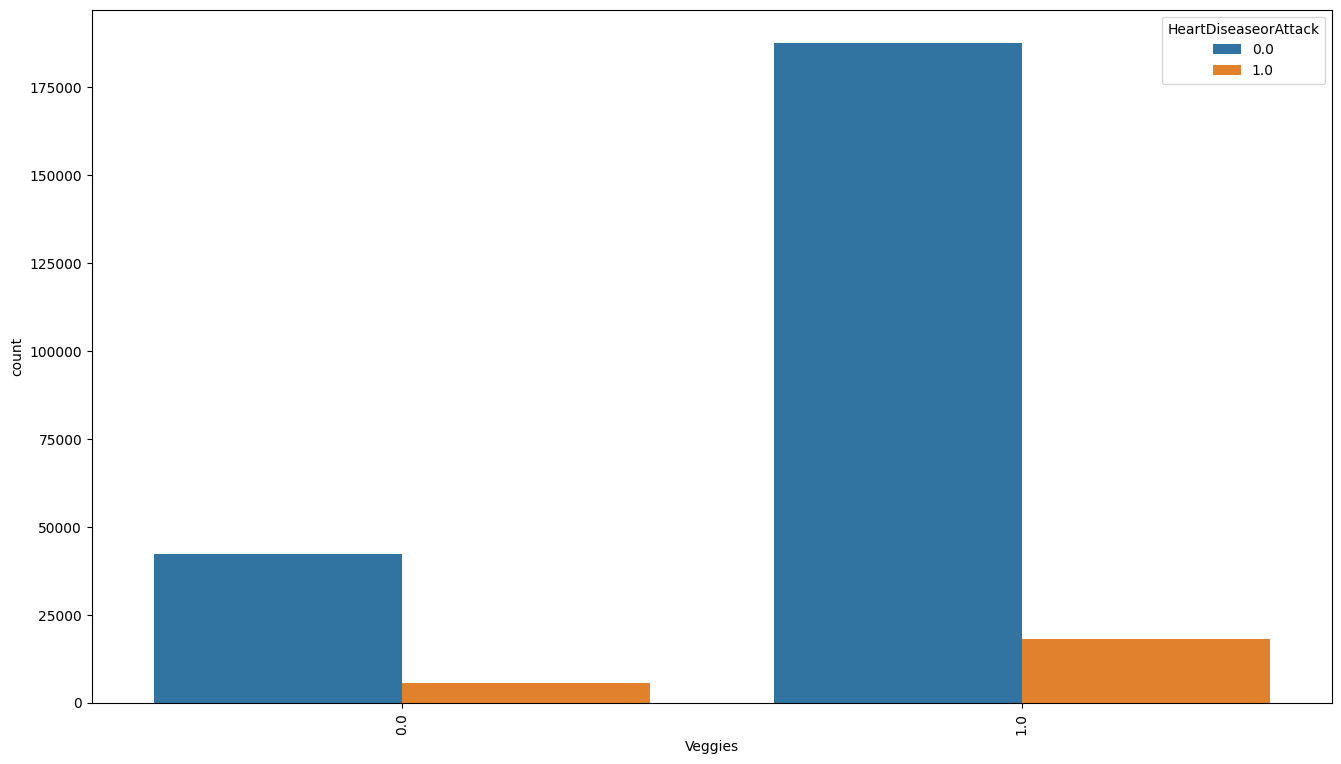

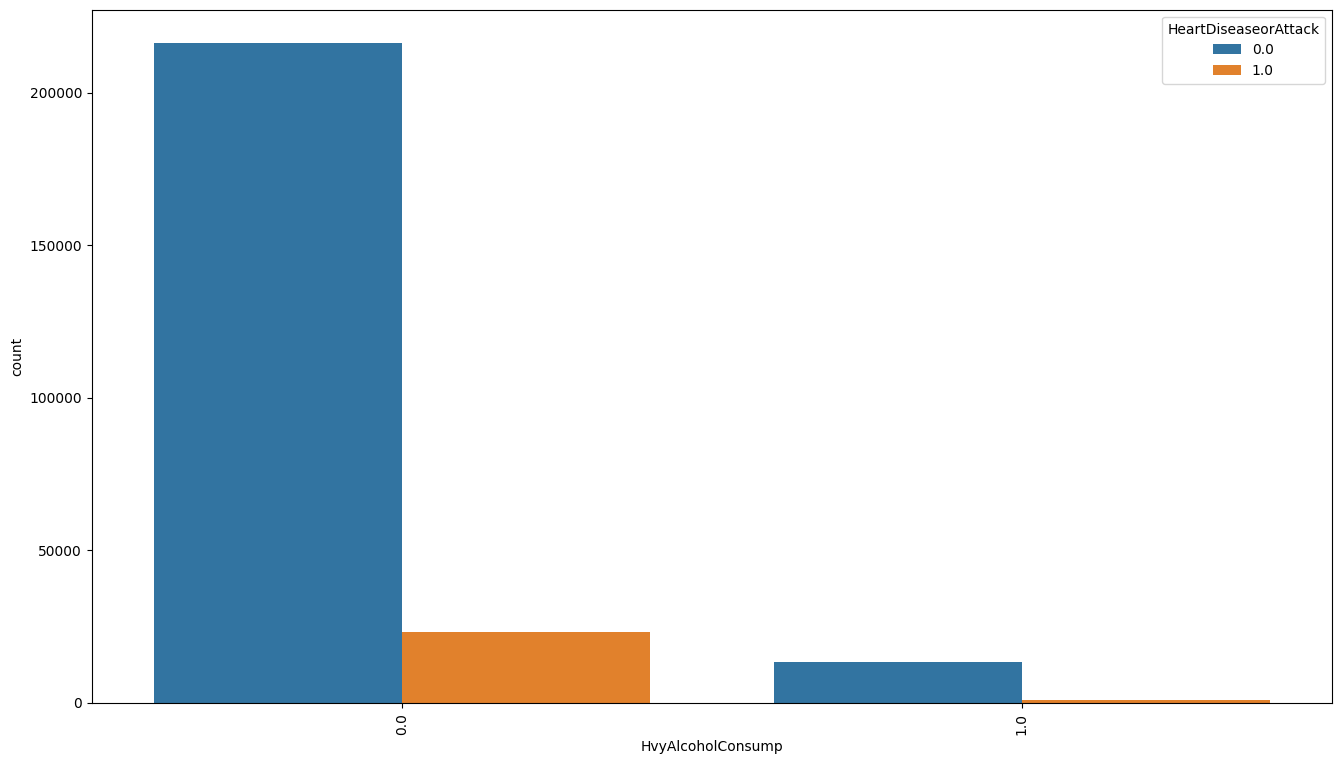

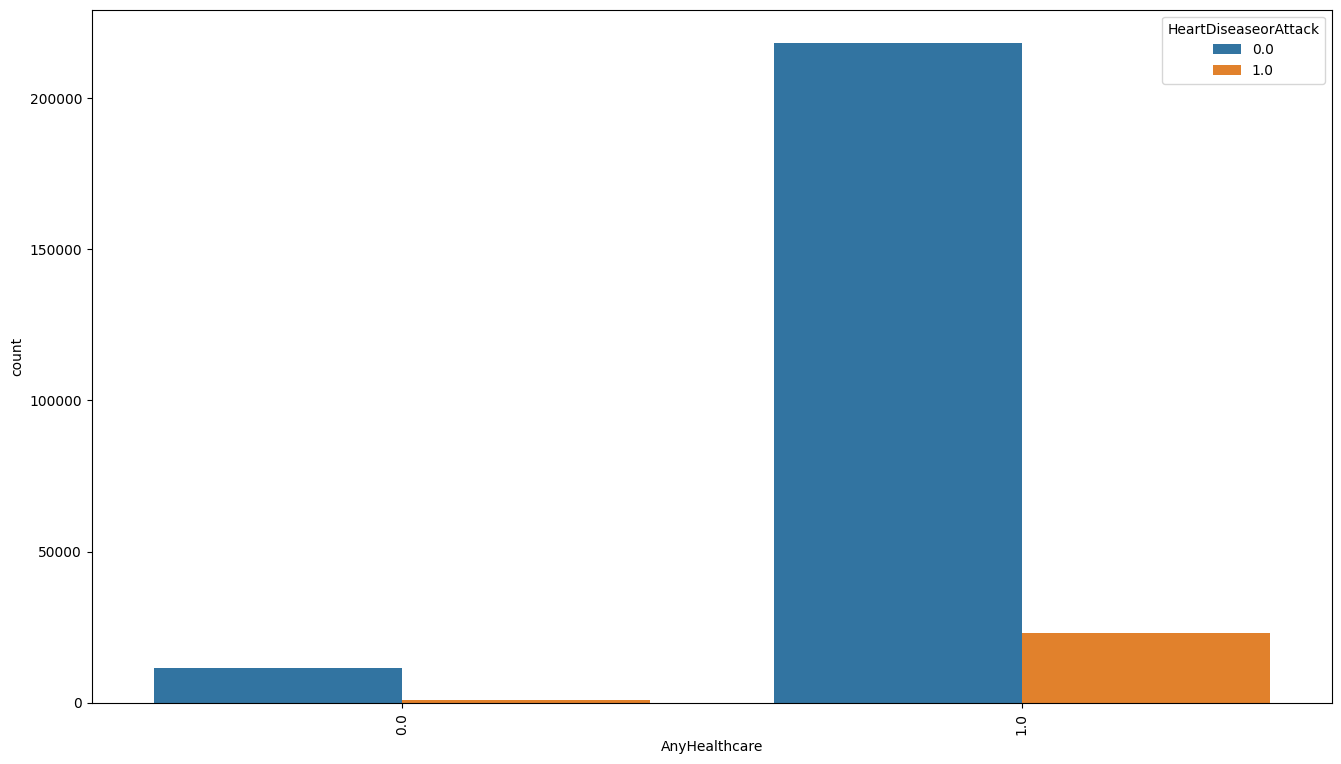

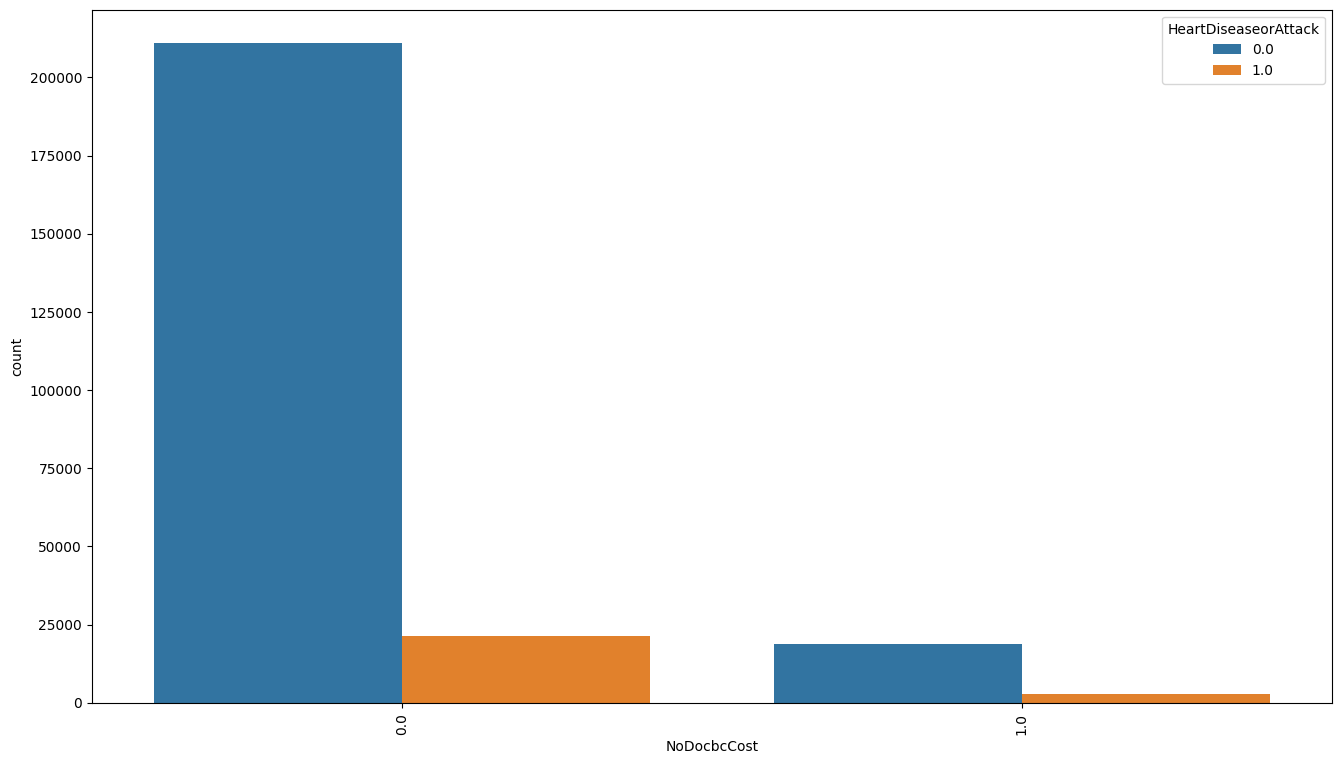

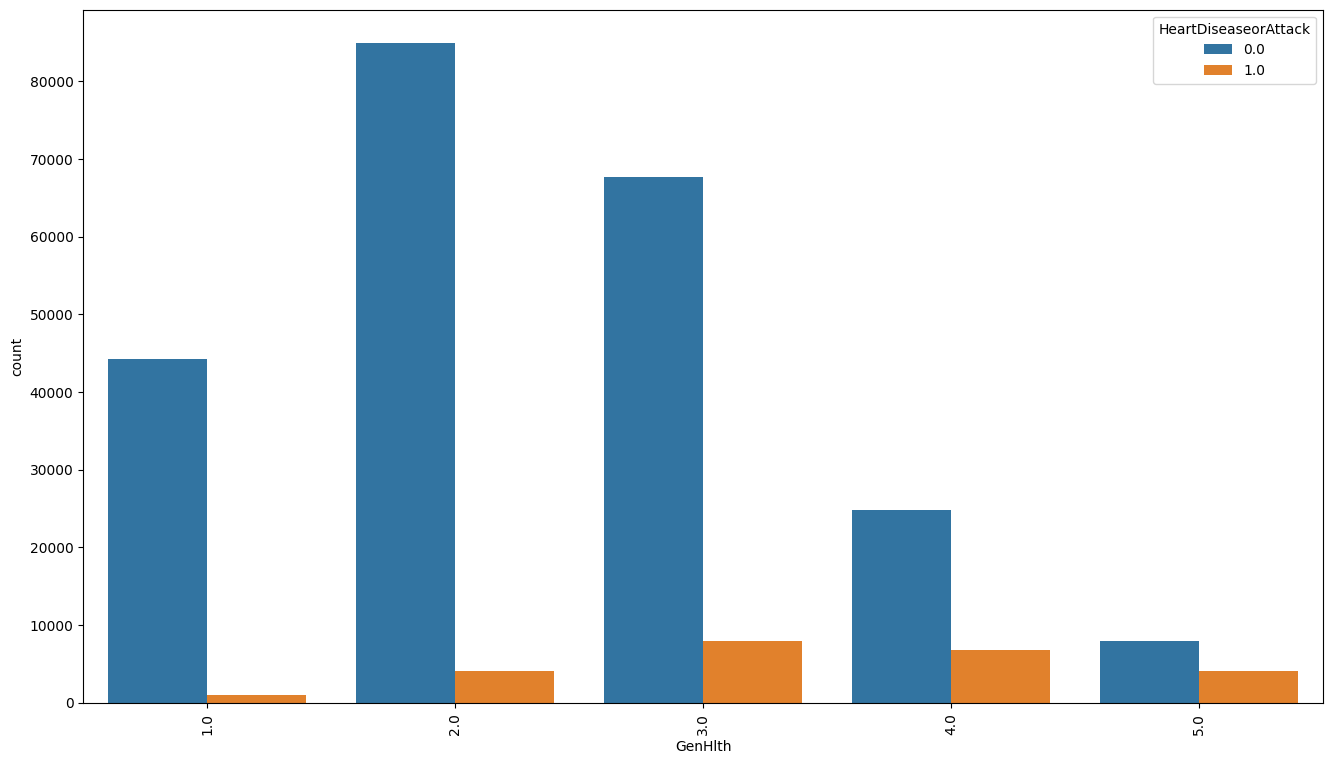

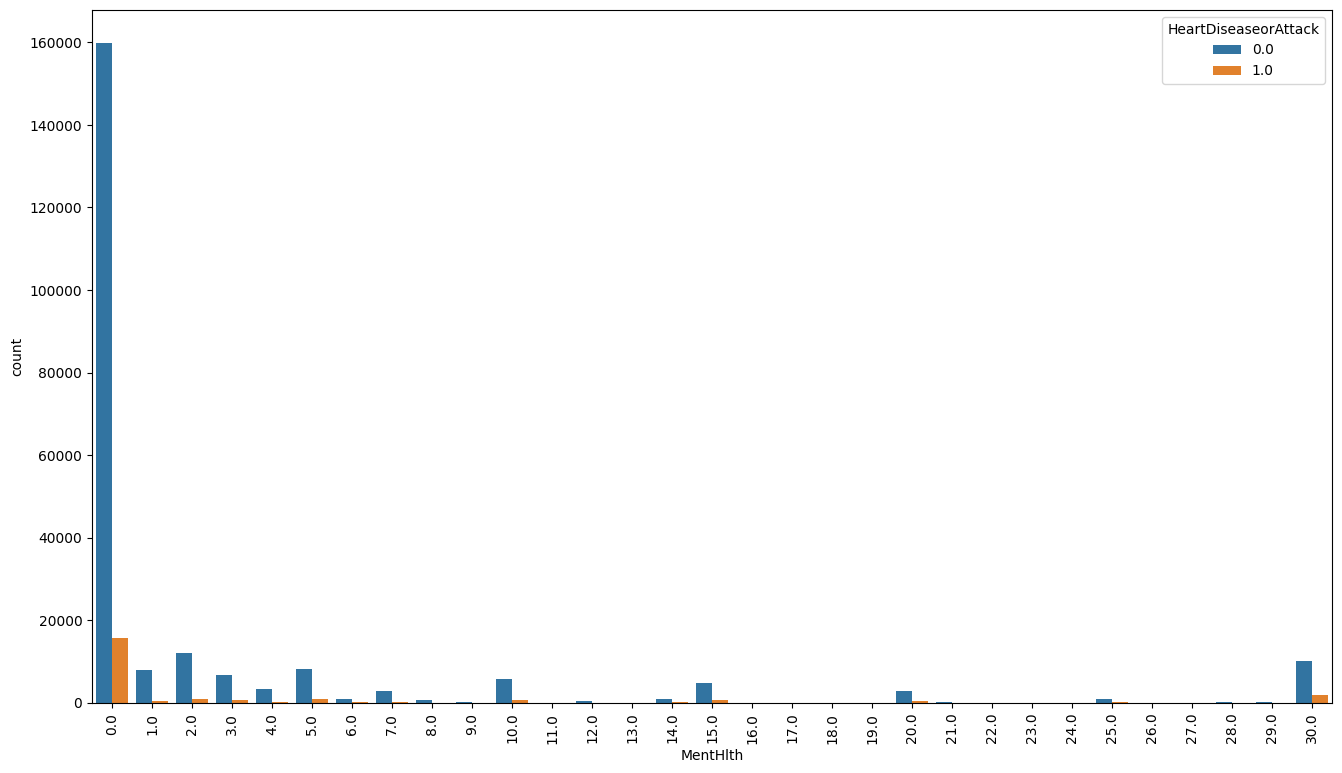

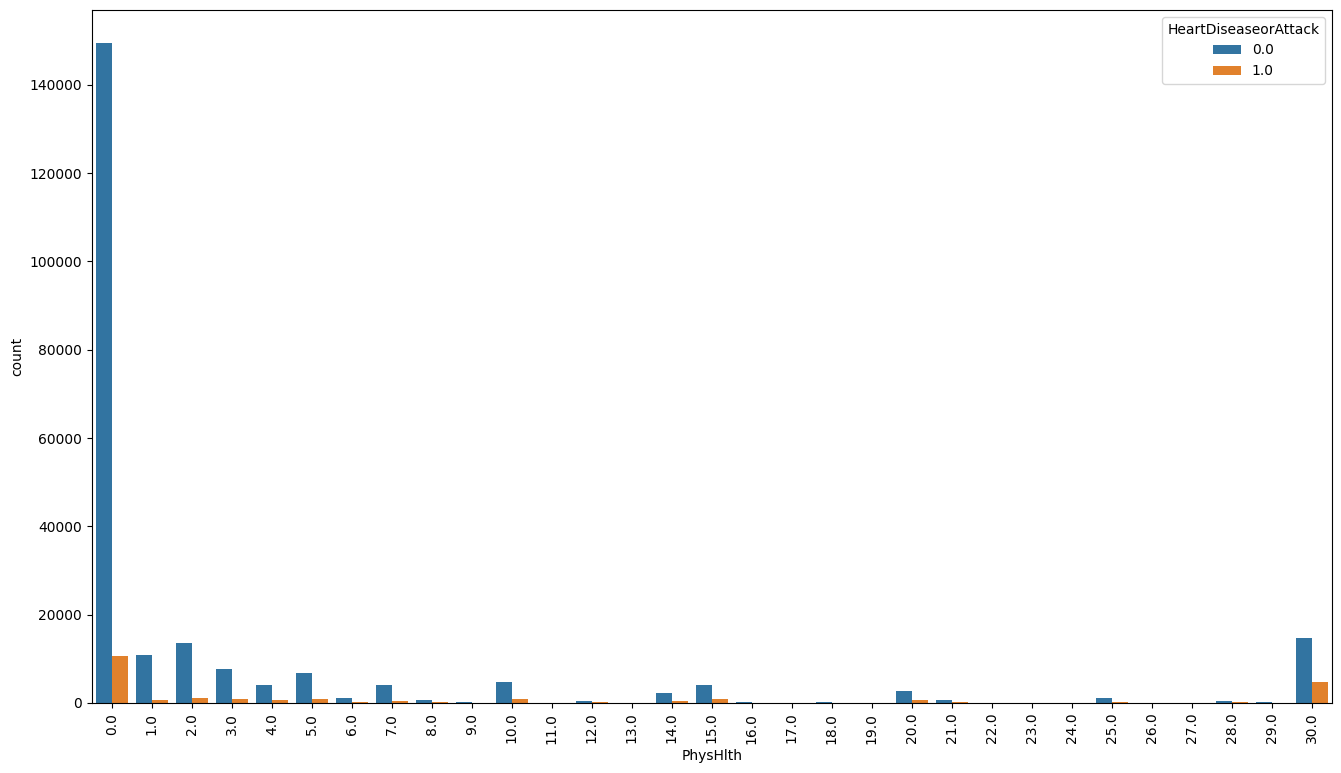

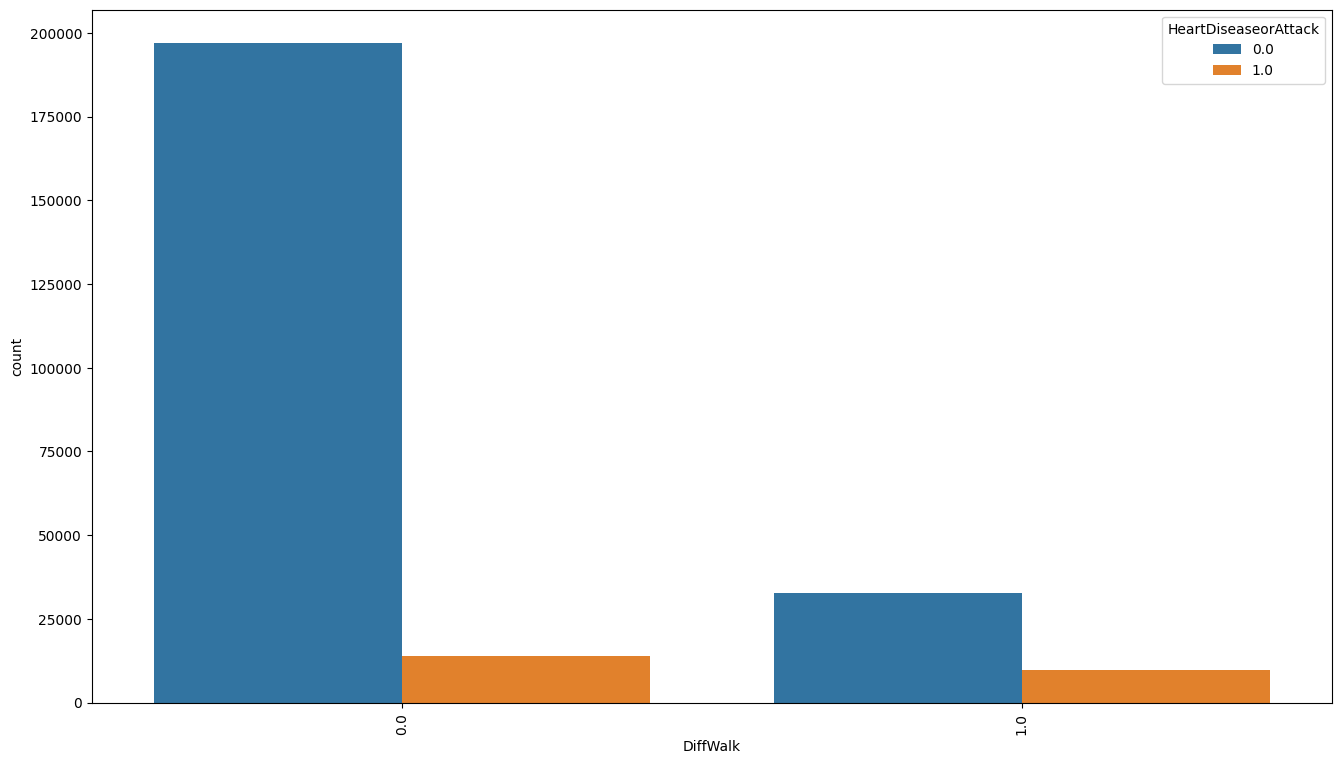

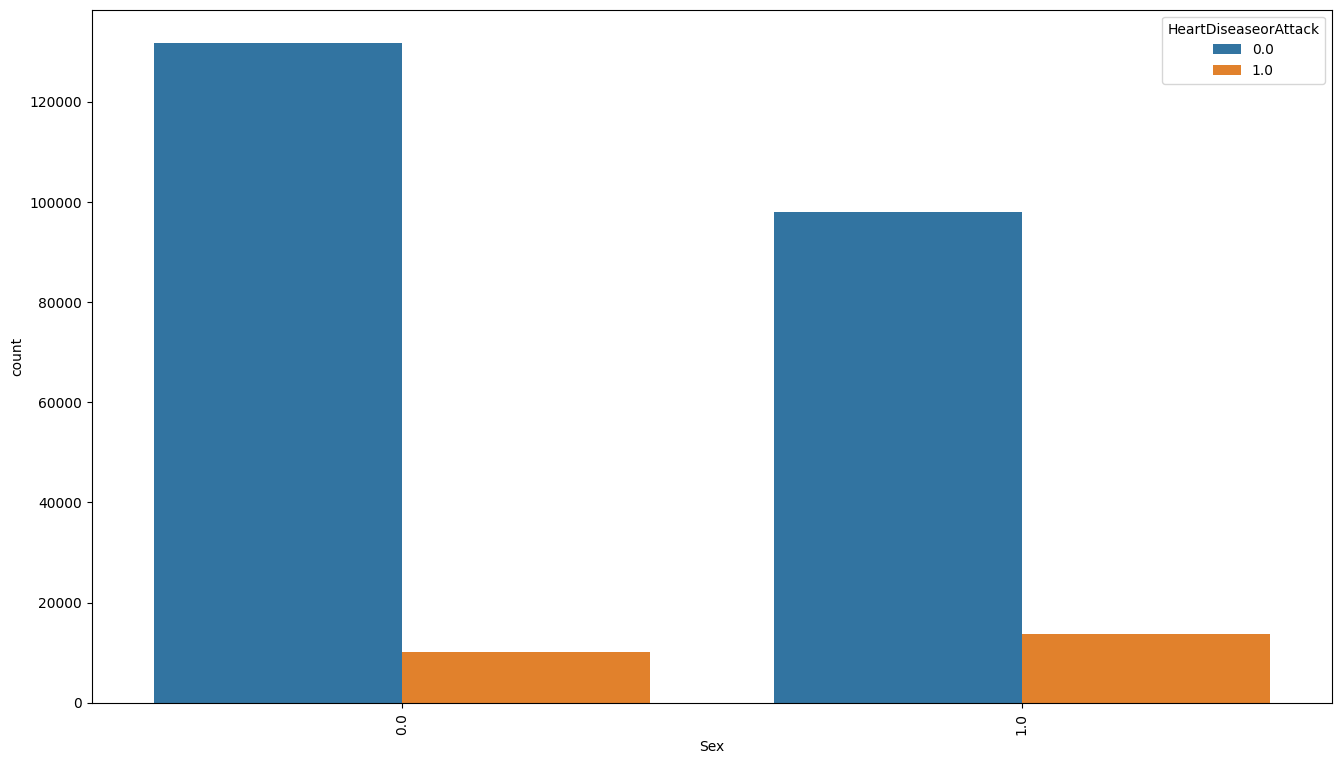

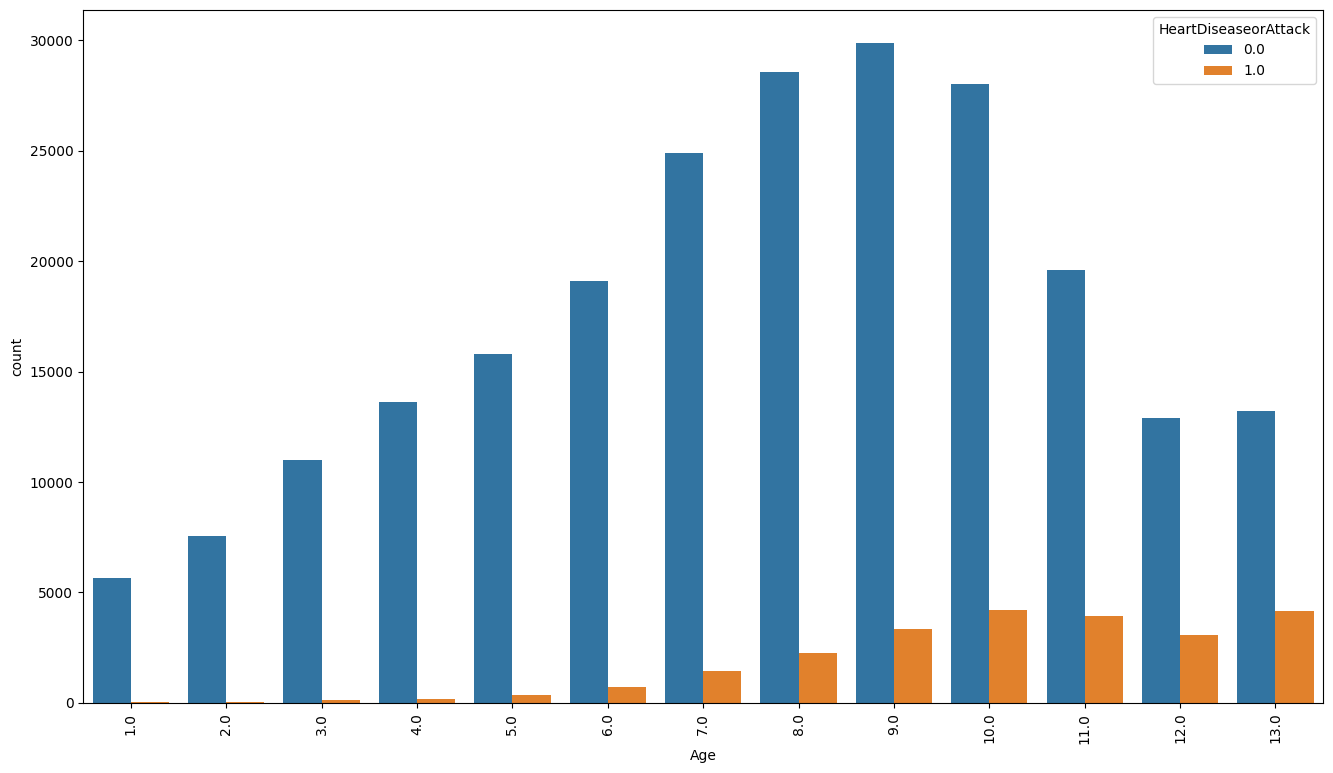

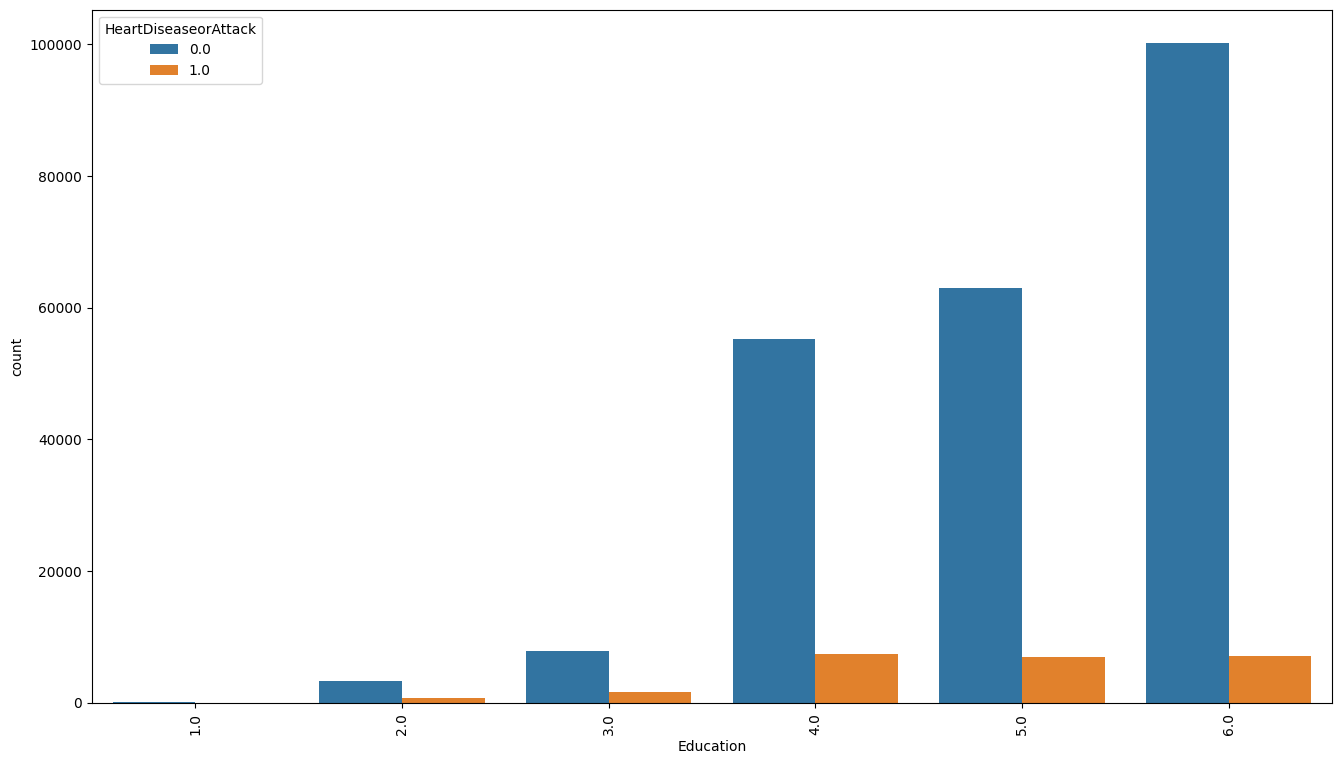

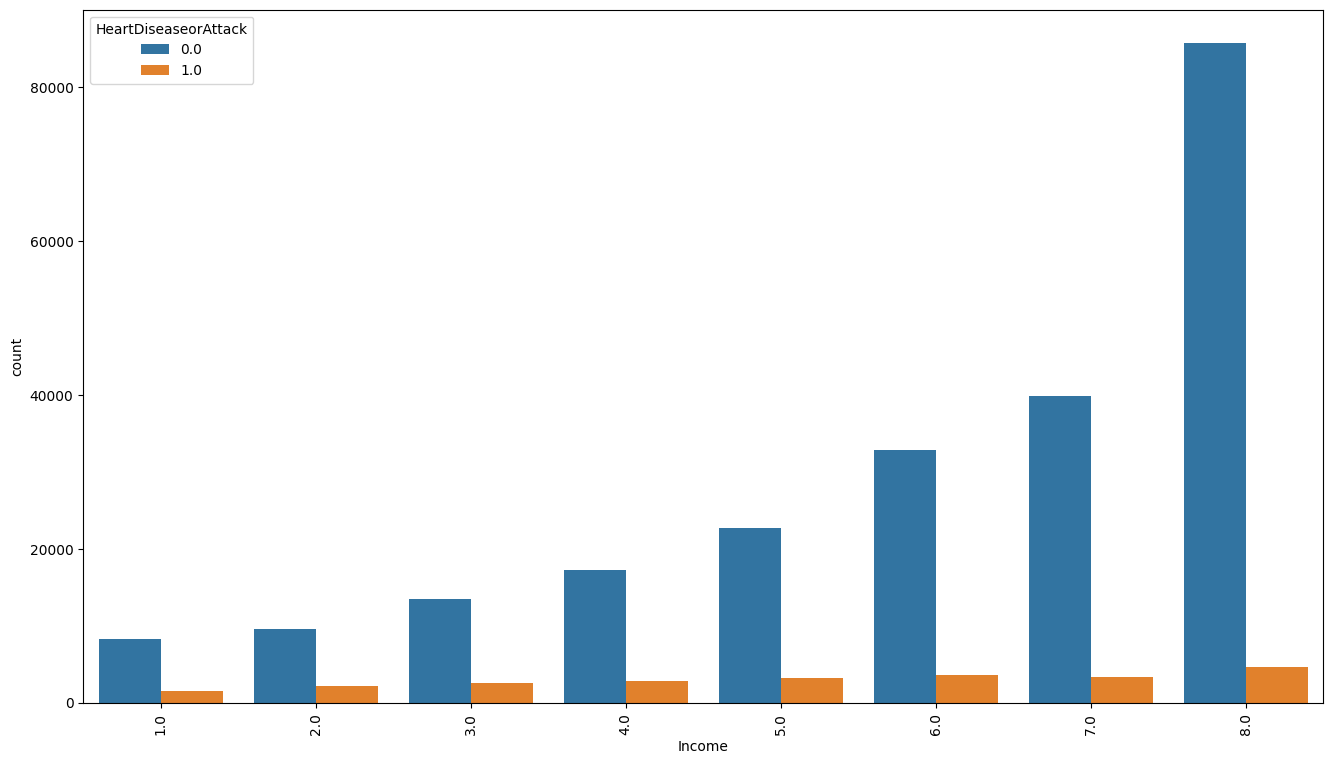

In [6]:
for i in heart_data: 
    plt.figure(figsize=(16,9))
    sns.countplot(data=heart_data, x=i, hue='HeartDiseaseorAttack')
    plt.xticks(rotation=90)
    plt.show()

Gösterimsel olarak bakınca, kalp hastalığı veya kalp krizi geçirme riskinin orantısal olarak farklı dağıldığını gördüm. İlgili kategorilerdeki kalp problemi olmayan (0) veya olan (1) gözlemlerin, farklı kategorilerde orantısal olarak daha sık olduğu göze çarpıyor.

Şimdi bunun bir de korrelasyon ölçümü olan p-değeri ile incelemesini yaparak hipotezimi kanıtlamak istiyorum. P-değeri  0.05 'ten küçükse, null hipotezim yanlış olacaktır. Yani kategorik ilişki olduğunu doğrulayabilirim.

## 4. Değişkenlerin Korelasyonları

Bu bölümde ise p-değerine dayanarak kategorik farklılık olup olmadığına bakarak başladım. Buna göre kategorik olarak farklılıklar mevcut.

Sonrasında regresyon analizi ile bazı kategorileri karşılaştırdır.

En son aşamada ise korrelasyon matrix'ini oluşturarak hangi değişkenlerin birbiriyle ne kadar ilişkili olduğunu inceledim.

In [7]:
for i in heart_data:
    contingency_table = pd.crosstab(heart_data['HeartDiseaseorAttack'], heart_data[i])
    print(contingency_table)
    chi2, p, _, _ = chi2_contingency(pd.crosstab(heart_data['HeartDiseaseorAttack'], heart_data[i]))
    print("p-değeri:", p)

HeartDiseaseorAttack     0.0    1.0
HeartDiseaseorAttack               
0.0                   229787      0
1.0                        0  23893
p-değeri: 0.0
HighBP                   0.0    1.0
HeartDiseaseorAttack               
0.0                   138886  90901
1.0                     5965  17928
p-değeri: 0.0
HighChol                 0.0    1.0
HeartDiseaseorAttack               
0.0                   138949  90838
1.0                     7140  16753
p-değeri: 0.0
CholCheck              0.0     1.0
HeartDiseaseorAttack              
0.0                   9199  220588
1.0                    271   23622
p-değeri: 1.2043447691967748e-109
BMI                   12.0  13.0  14.0  15.0  16.0  17.0  18.0  19.0  20.0  \
HeartDiseaseorAttack                                                         
0.0                      5    20    33   115   296   680  1647  3681  5962   
1.0                      1     1     8    17    52    96   156   287   365   

BMI                   21.0  ...  86.0  

P-değeri ile korrelasyon analizi yaptığımda, kalp hastalığı veya kalp krizi görülme olayının her değişken için kategorik farklılık gösterdiğini doğruladım. Çünkü p-değeri hep 0 veya çok küçük bir sayıyı belirtiyor.



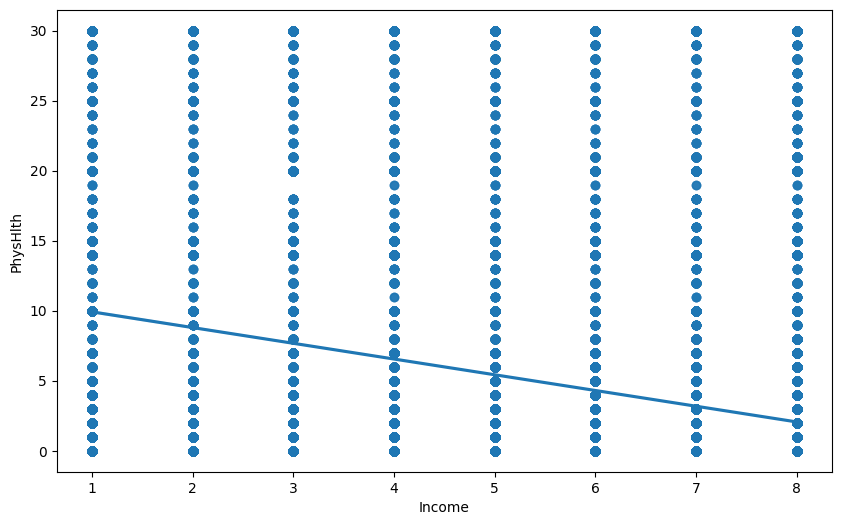

In [8]:
plt.figure(figsize=(10,6))
sns.regplot(x="Income", y="PhysHlth", data=heart_data)
plt.show()

Gelir düzeyi arttıkça fiziksel sağlık problemi olduğu söylenen gön sayısı azalıyor.

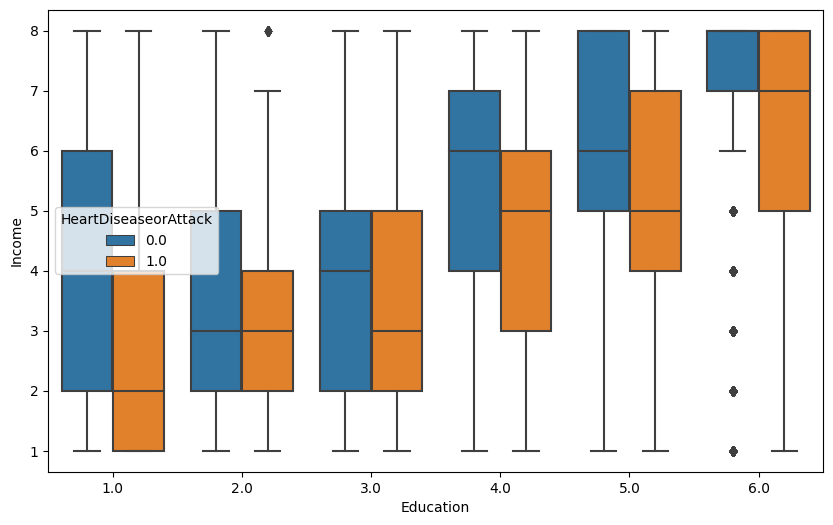

In [9]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Education", y="Income", data=heart_data, hue="HeartDiseaseorAttack")
plt.show()

Eğiyim seviyesi ve gelir seviyesi, en düşük eğitim seviyesi haricinde birbiriyle doğru orantılı gözüküyor. Bununla beraber ise eğitim seviyesi grupları arası karşılaştırma yapıldığında kalp rahatsızlığı olan kişilerin gelir seviyesi daha düşük olarak gözüküyor.

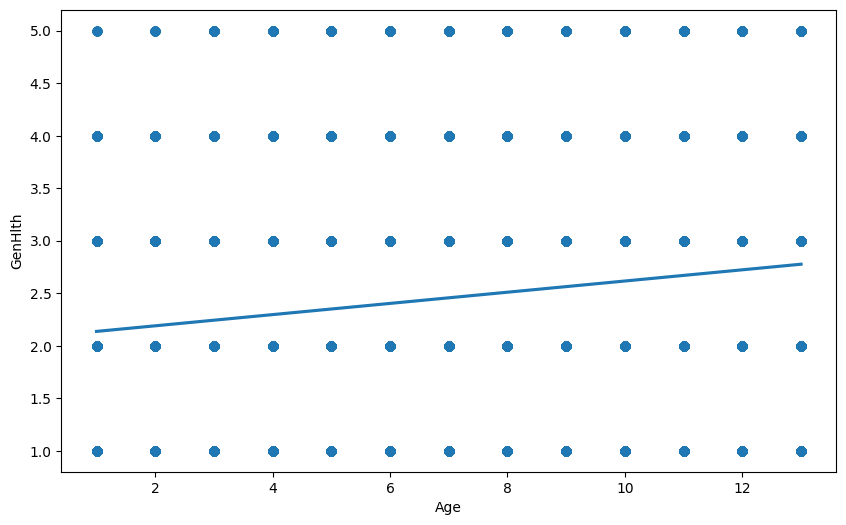

In [10]:
plt.figure(figsize=(10,6))
sns.regplot(x="Age", y="GenHlth", data=heart_data)
plt.show()

Yaş arttıkça genel sağlık problemi şikayeti puanı artış gösteriyor.

<Axes: >

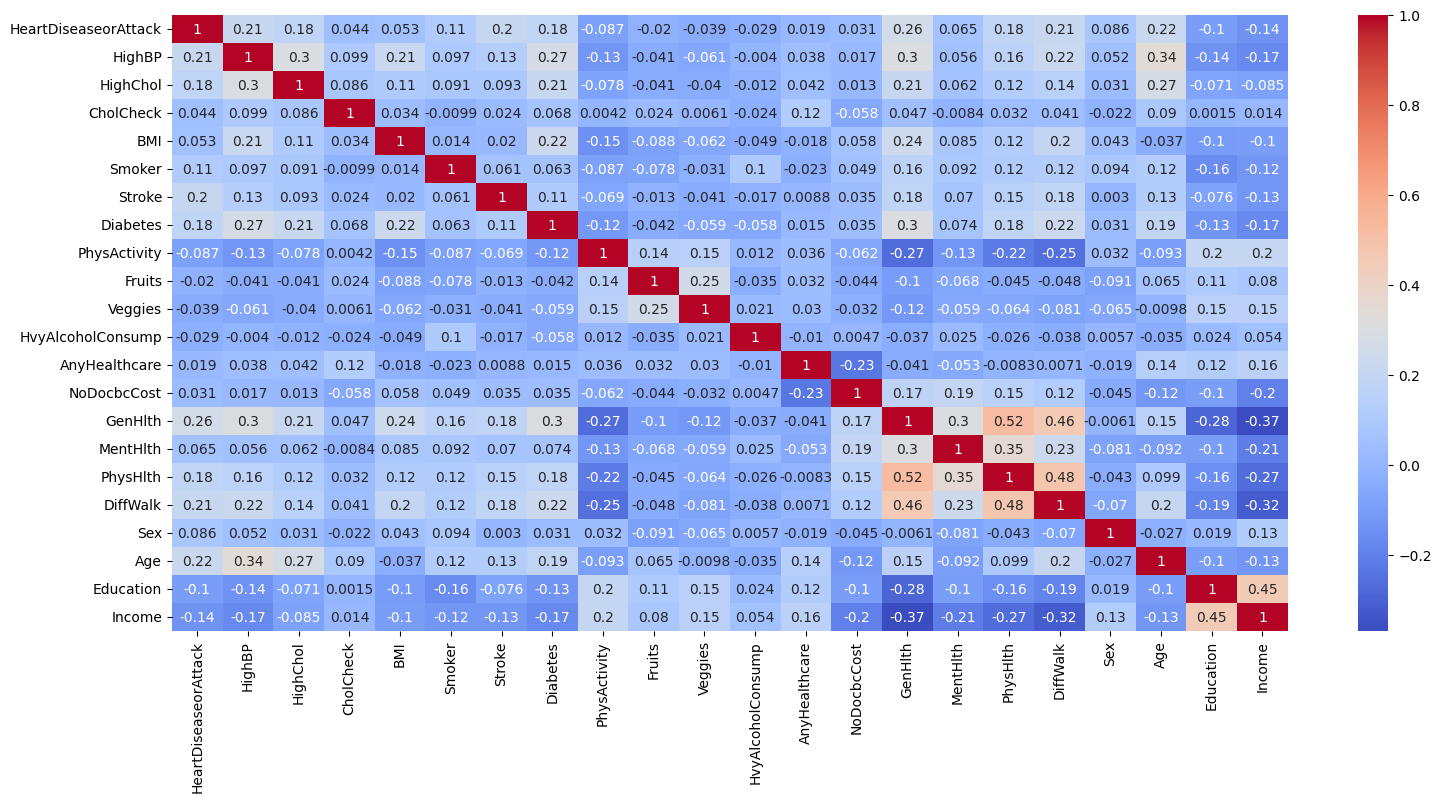

In [11]:
fig, ax = plt.subplots(figsize=(18, 8))
sns.heatmap(heart_data.corr(), annot=True, cmap='coolwarm', ax=ax)

İlgili yerlerde kırmızıya yaklaşan bölümlerde korelasyonlar gözükmekte.

## Makine Öğrenmesi ile Model Oluşturma

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc

In [13]:
X = heart_data.drop("HeartDiseaseorAttack", axis=1)
y = heart_data["HeartDiseaseorAttack"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

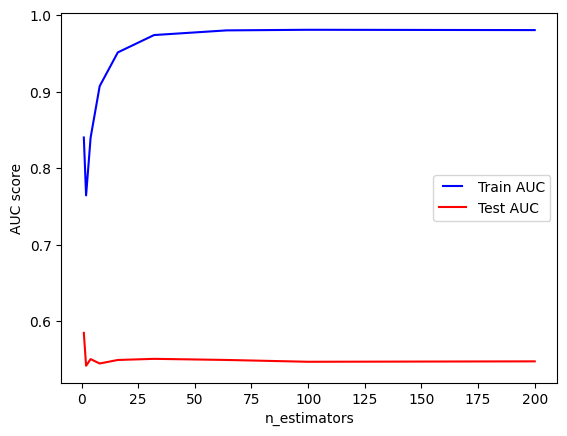

In [15]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
   randomforest_model = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   randomforest_model.fit(X_train, y_train)
   train_pred = randomforest_model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = randomforest_model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

n_estimator değerleri ne yazık ki performansı artırmak konusunda başarılı değil. Verilerimizin tahmin edilebilir olmadığını gördük.

In [20]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc


0.5477306985078153

AUC skoru %54.

In [21]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[45357   678]
 [ 4183   518]]


In [11]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Başarısı: {accuracy * 100:.2f}%")

Model Başarısı: 85.28%


DecisionTree, bu veri için daha yüksek başarı oranına ulaşıyor gözüküyor.

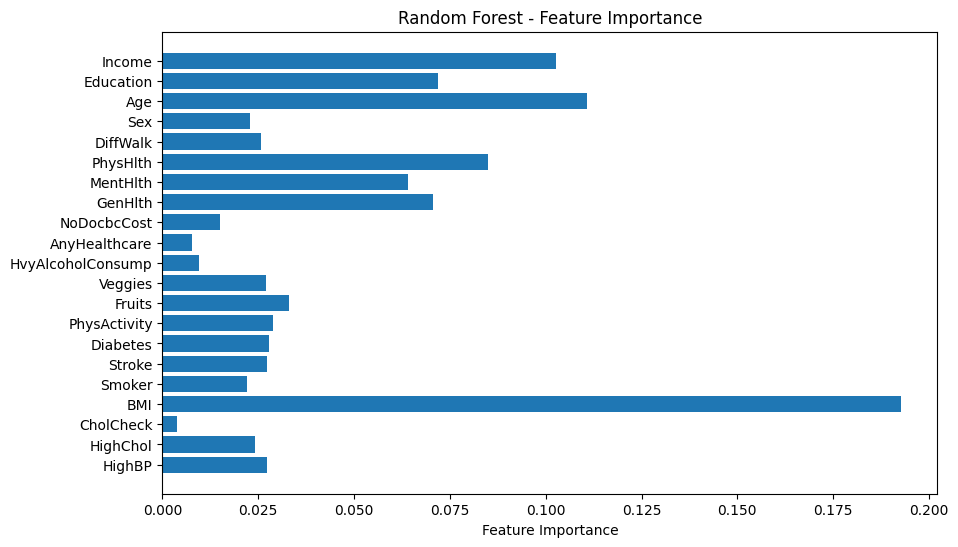

In [22]:
randomforest_model.fit(X_train, y_train)
feature_importance = randomforest_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importance)
plt.xlabel("Feature Importance")
plt.title("Random Forest - Feature Importance")
plt.show()

Daha derin bir analiz ve feature engineering gerçekleştirmek adına önemli featureları da bu tablodan görebilirz.

C. Orhan Akpınar